___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [339]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [340]:
tree = pd.read_csv("treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [341]:
tree

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2696     123     10                               212   
1            3269     110     19                               134   
2            3283     322     18                               346   
3            2847      89     31                               270   
4            3248      93     12                               507   
...           ...     ...    ...                               ...   
144616       2971     180     23                               196   
144617       2479      13     10                               234   
144618       2763     245     14                               201   
144619       3239      42      4                               158   
144620       3152     156     15                               108   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   48                             2245   
1                                   40                             3734   
2                                  104                             4369   
3                                  175                             1320   
4                                  118                              570   
...                                ...                              ...   
144616                              49                              290   
144617                              79                              630   
144618                              11                             1677   
144619                              31                             2538   
144620                              14                             2150   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 237             231            123   
1                 249             216             88   
2                 170             217            185   
3                 248             173             29   
4                 239             221            110   
...               ...             ...            ...   
144616            220             246            144   
144617            210             219            144   
144618            189             250            197   
144619            220             229            145   
144620            235             240            131   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                     2113  ...           0.0           0.0   
1                                     3960  ...           0.0           0.0   
2                                     1330  ...           0.0           0.0   
3                                      889  ...           0.0           0.0   
4                                      945  ...           0.0           0.0   
...                                    ...  ...           ...           ...   
144616                                 754  ...           0.0           0.0   
144617                                1572  ...           0.0           0.0   
144618                                2254  ...           0.0           0.0   
144619                                2767  ...           0.0           0.0   
144620                                2716  ...           NaN           NaN   

        Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           1.0   
2                0.0           0.0           0.0           0.0           1.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
144616           0.0           0.0           0.0           0.0           0.0   
1446

Features

Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [10]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144621 entries, 0 to 144620
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           144621 non-null  int64  
 1   Aspect                              144621 non-null  int64  
 2   Slope                               144621 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    144621 non-null  int64  
 4   Vertical_Distance_To_Hydrology      144621 non-null  int64  
 5   Horizontal_Distance_To_Roadways     144621 non-null  int64  
 6   Hillshade_9am                       144621 non-null  int64  
 7   Hillshade_Noon                      144621 non-null  int64  
 8   Hillshade_3pm                       144621 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  144621 non-null  int64  
 10  Wilderness_Area_1                   144621 non-null  int64  
 11  Wilderness_Area_2         

In [11]:
tree.describe().T

count         mean          std  \
Elevation                           144621.0  2747.852546   418.043773   
Aspect                              144621.0   156.211380   109.595795   
Slope                               144621.0    16.330505     8.314730   
Horizontal_Distance_To_Hydrology    144621.0   227.566716   209.004826   
Vertical_Distance_To_Hydrology      144621.0    50.712815    60.709091   
Horizontal_Distance_To_Roadways     144621.0  1722.934843  1335.162203   
Hillshade_9am                       144621.0   212.416419    30.623454   
Hillshade_Noon                      144621.0   218.523520    22.691778   
Hillshade_3pm                       144621.0   134.466924    45.980248   
Horizontal_Distance_To_Fire_Points  144621.0  1522.605424  1106.873902   
Wilderness_Area_1                   144621.0     0.238354     0.426078   
Wilderness_Area_2                   144621.0     0.033460     0.179835   
Wilderness_Area_3                   144621.0     0.417028     0.493069   
Wilderness_Area_4                   144621.0     0.309353     0.462229   
Soil_Type_1                         144621.0     0.018635     0.135232   
Soil_Type_2                         144621.0     0.036067     0.186457   
Soil_Type_3                         144621.0     0.058802     0.235255   
Soil_Type_4                         144621.0     0.046646     0.210880   
Soil_Type_5                         144621.0     0.009079     0.094850   
Soil_Type_6                         144620.0     0.037491     0.189963   
Soil_Type_7                         144620.0     0.000062     0.007889   
Soil_Type_8                         144620.0     0.000090     0.009481   
Soil_Type_9                         144620.0     0.000650     0.025486   
Soil_Type_10                        144620.0     0.125909     0.331748   
Soil_Type_11                        144620.0     0.023724     0.152189   
Soil_Type_12                        144620.0     0.015517     0.123596   
Soil_Type_13                        144620.0     0.031676     0.175137   
Soil_Type_14                        144620.0     0.006306     0.079161   
Soil_Type_15                        144620.0     0.000007     0.002630   
Soil_Type_16                        144620.0     0.004515     0.067044   
Soil_Type_17                        144620.0     0.030355     0.171564   
Soil_Type_18                        144620.0     0.003409     0.058287   
Soil_Type_19                        144620.0     0.002856     0.053363   
Soil_Type_20                        144620.0     0.007848     0.088242   
Soil_Type_21                        144620.0     0.000712     0.026678   
Soil_Type_22                        144620.0     0.021947     0.146512   
Soil_Type_23                        144620.0     0.047960     0.213683   
Soil_Type_24                        144620.0     0.015247     0.122534   
Soil_Type_25                        144620.0     0.000221     0.014874   
Soil_Type_26                        144620.0     0.003347     0.057754   
Soil_Type_27                        144620.0     0.000837     0.028913   
Soil_Type_28                        144620.0     0.000664     0.025756   
Soil_Type_29                        144620.0     0.084732     0.278484   
Soil_Type_30                        144620.0     0.046709     0.211015   
Soil_Type_31                        144620.0     0.019942     0.139801   
Soil_Type_32                        144620.0     0.041467     0.199369   
Soil_Type_33                        144620.0     0.040140     0.196287   
Soil_Type_34                        144620.0     0.001521     0.038973   
Soil_Type_35                        144620.0     0.006562     0.080740   
Soil_Type_36                        144620.0     0.000401     0.020022   
Soil_Type_37                        144620.0     0.001777     0.042118   
Soil_Type_38                        144620.0     0.046038     0.209568   
Soil_Type_39                        144620.0     0.041370     0.199146   
Soil_Type_40                        144620.

In [12]:
tree.isnull().sum().sum()

36

In [342]:
Wilderness_Area_Fields = ['Wilderness_Area_'+str(i) for i in range(1,5)]
train_wilderness = tree[Wilderness_Area_Fields]
tree['Wilderness_Area'] = train_wilderness.idxmax(axis = 1)

In [343]:
Soil_Type_Fields = ['Soil_Type_'+ str(i) for i in range(1,41)]
train_Soil_Type = tree[Soil_Type_Fields]
tree['Soil_Type'] = train_Soil_Type.idxmax(axis = 1)

In [344]:
tree.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [345]:
tree.columns[10:54]

Index(['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40'],
      dtype='object')

In [346]:
df=tree.drop(tree.columns[10:54], axis = 1)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144621 entries, 0 to 144620
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           144621 non-null  int64  
 1   Aspect                              144621 non-null  int64  
 2   Slope                               144621 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    144621 non-null  int64  
 4   Vertical_Distance_To_Hydrology      144621 non-null  int64  
 5   Horizontal_Distance_To_Roadways     144621 non-null  int64  
 6   Hillshade_9am                       144621 non-null  int64  
 7   Hillshade_Noon                      144621 non-null  int64  
 8   Hillshade_3pm                       144621 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  144621 non-null  int64  
 10  Cover_Type                          144620 non-null  float64
 11  Wilderness_Area           

In [230]:
df.describe()

Elevation         Aspect          Slope  \
count  144621.000000  144621.000000  144621.000000   
mean     2747.852546     156.211380      16.330505   
std       418.043773     109.595795       8.314730   
min      1859.000000       0.000000       0.000000   
25%      2374.000000      65.000000      10.000000   
50%      2753.000000     125.000000      15.000000   
75%      3106.000000     260.000000      22.000000   
max      3857.000000     360.000000      65.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     144621.000000                   144621.000000   
mean                         227.566716                       50.712815   
std                          209.004826                       60.709091   
min                            0.000000                     -163.000000   
25%                           66.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          329.000000                       79.000000   
max                         1347.000000                      598.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    144621.000000  144621.000000   144621.000000   
mean                       1722.934843     212.416419      218.523520   
std                        1335.162203      30.623454       22.691778   
min                           0.000000      27.000000       53.000000   
25%                         755.000000     195.000000      206.000000   
50%                        1317.000000     220.000000      222.000000   
75%                        2301.000000     235.000000      235.000000   
max                        7033.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points     Cover_Type  
count  144621.000000                       144621.000000  144620.000000  
mean      134.466924                         1522.605424       3.997718  
std        45.980248                         1106.873902       1.999089  
min         0.000000                            0.000000       1.000000  
25%       106.000000                          735.000000       2.000000  
50%       137.000000                         1274.000000       4.000000  
75%       167.000000                         1999.000000       6.000000  
max       249.000000                         7145.000000       7.000000

In [348]:
# categorik verilerin istatistiksel analizi icin:
df.describe(include=['O'])

Wilderness_Area     Soil_Type
count              144621        144621
unique                  4            40
top     Wilderness_Area_3  Soil_Type_10
freq                60311         18209

In [232]:
#columns = ['Wilderness_Area_','Soil_Type_']
#df.drop(columns, inplace=True, axis=1)

In [233]:
# categorik verilerin istatistiksel analizi icin:
#df.describe(include=['O'])

In [349]:
df.apply(lambda x: x.nunique())

Elevation                             1961
Aspect                                 361
Slope                                   57
Horizontal_Distance_To_Hydrology      1263
Vertical_Distance_To_Hydrology         554
Horizontal_Distance_To_Roadways       6344
Hillshade_9am                          203
Hillshade_Noon                         163
Hillshade_3pm                          250
Horizontal_Distance_To_Fire_Points    6117
Cover_Type                               7
Wilderness_Area                          4
Soil_Type                               40
dtype: int64

In [235]:
df.isnull().sum()*100/tree.shape[0]

Elevation                             0.000000
Aspect                                0.000000
Slope                                 0.000000
Horizontal_Distance_To_Hydrology      0.000000
Vertical_Distance_To_Hydrology        0.000000
Horizontal_Distance_To_Roadways       0.000000
Hillshade_9am                         0.000000
Hillshade_Noon                        0.000000
Hillshade_3pm                         0.000000
Horizontal_Distance_To_Fire_Points    0.000000
Cover_Type                            0.000691
Wilderness_Area                       0.000000
Soil_Type                             0.000000
dtype: float64

In [236]:
df[df['Cover_Type'].isna()]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
144620       3152     156     15                               108   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
144620                              14                             2150   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
144620            235             240            131   

        Horizontal_Distance_To_Fire_Points  Cover_Type    Wilderness_Area  \
144620                                2716         NaN  Wilderness_Area_1   

          Soil_Type  
144620  Soil_Type_1

In [237]:
df['Cover_Type'].value_counts(dropna=False)

5.0    20872
2.0    20771
1.0    20673
6.0    20630
4.0    20601
7.0    20543
3.0    20530
NaN        1
Name: Cover_Type, dtype: int64

In [238]:
# Target Label
df.Cover_Type.unique() 

array([ 6.,  1.,  7.,  5.,  2.,  3.,  4., nan])

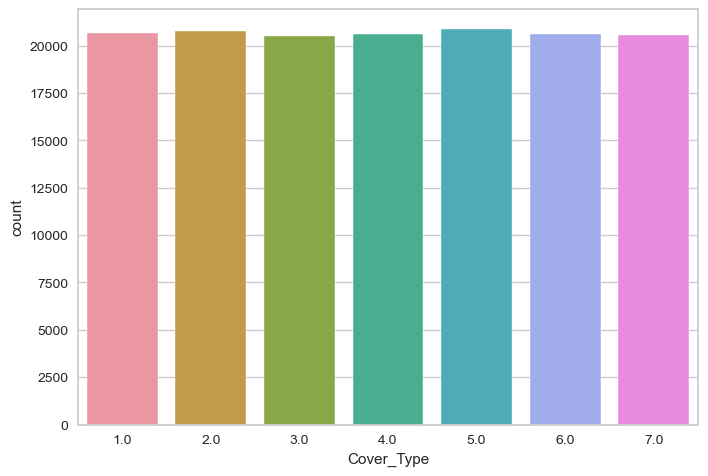

In [239]:
# df.Cover_Type.value_counts(dropna=False).sort_index()
sns.countplot(x='Cover_Type',data=df);

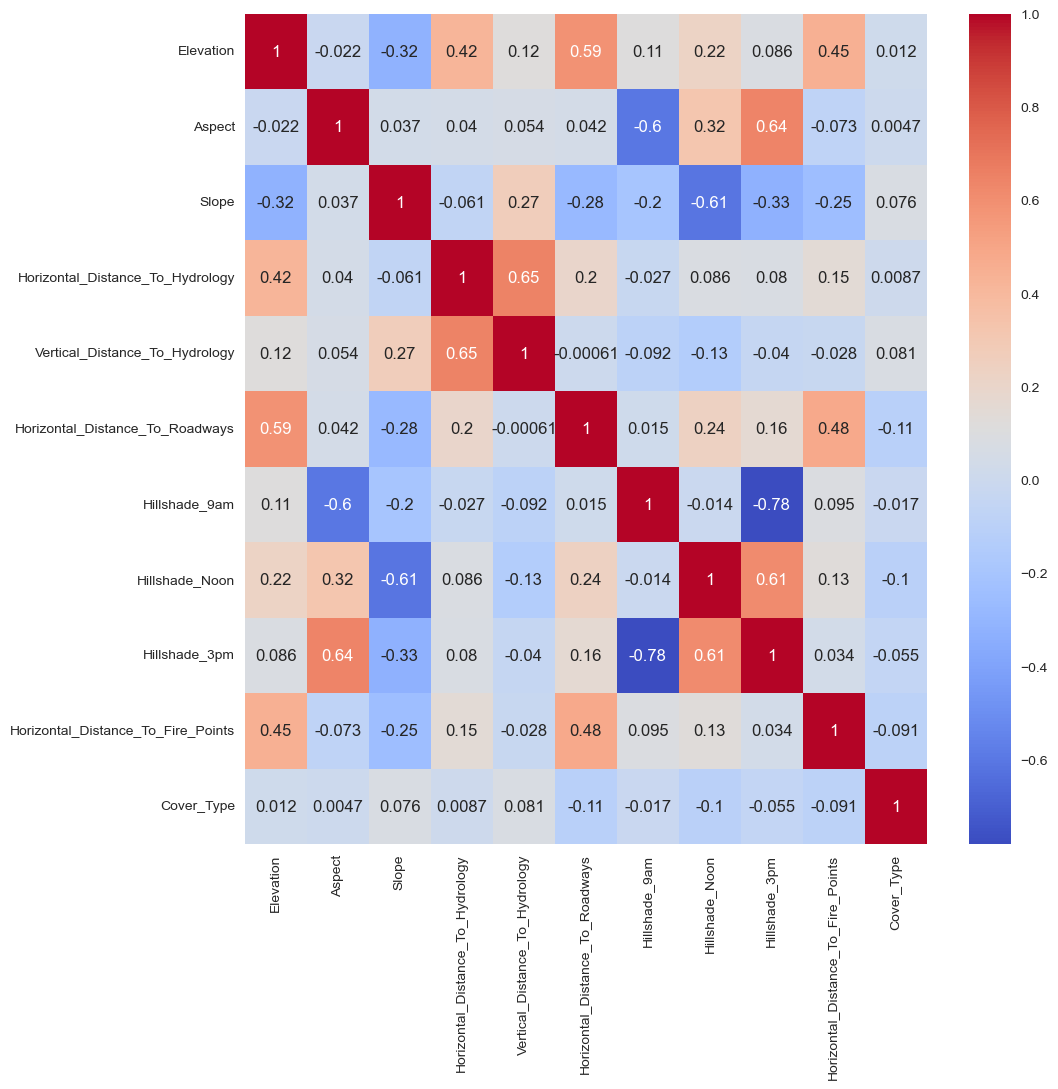

In [240]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

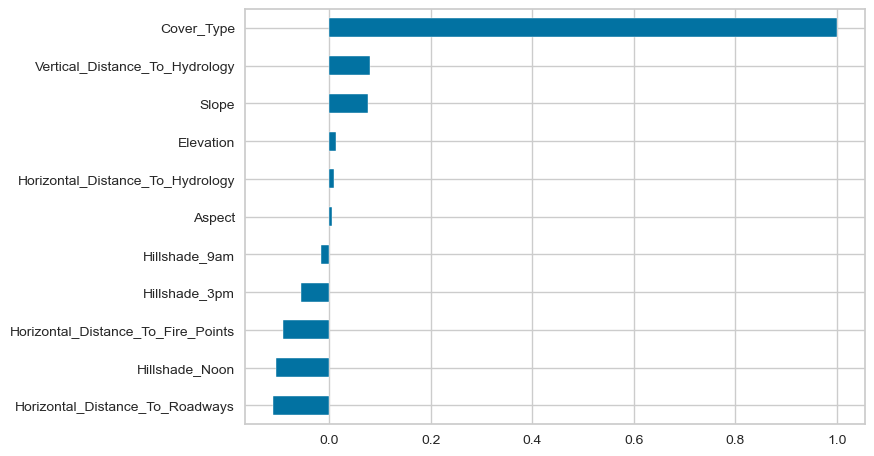

In [350]:
df.corr()["Cover_Type"].sort_values().plot.barh();

In [351]:
df.groupby(['Wilderness_Area'])['Soil_Type'].describe(include=['O'])

count unique           top   freq
Wilderness_Area                                     
Wilderness_Area_1  34732     23  Soil_Type_29  12247
Wilderness_Area_2   4839     18  Soil_Type_40   1203
Wilderness_Area_3  60311     29  Soil_Type_32   5693
Wilderness_Area_4  44739     12  Soil_Type_10  12892

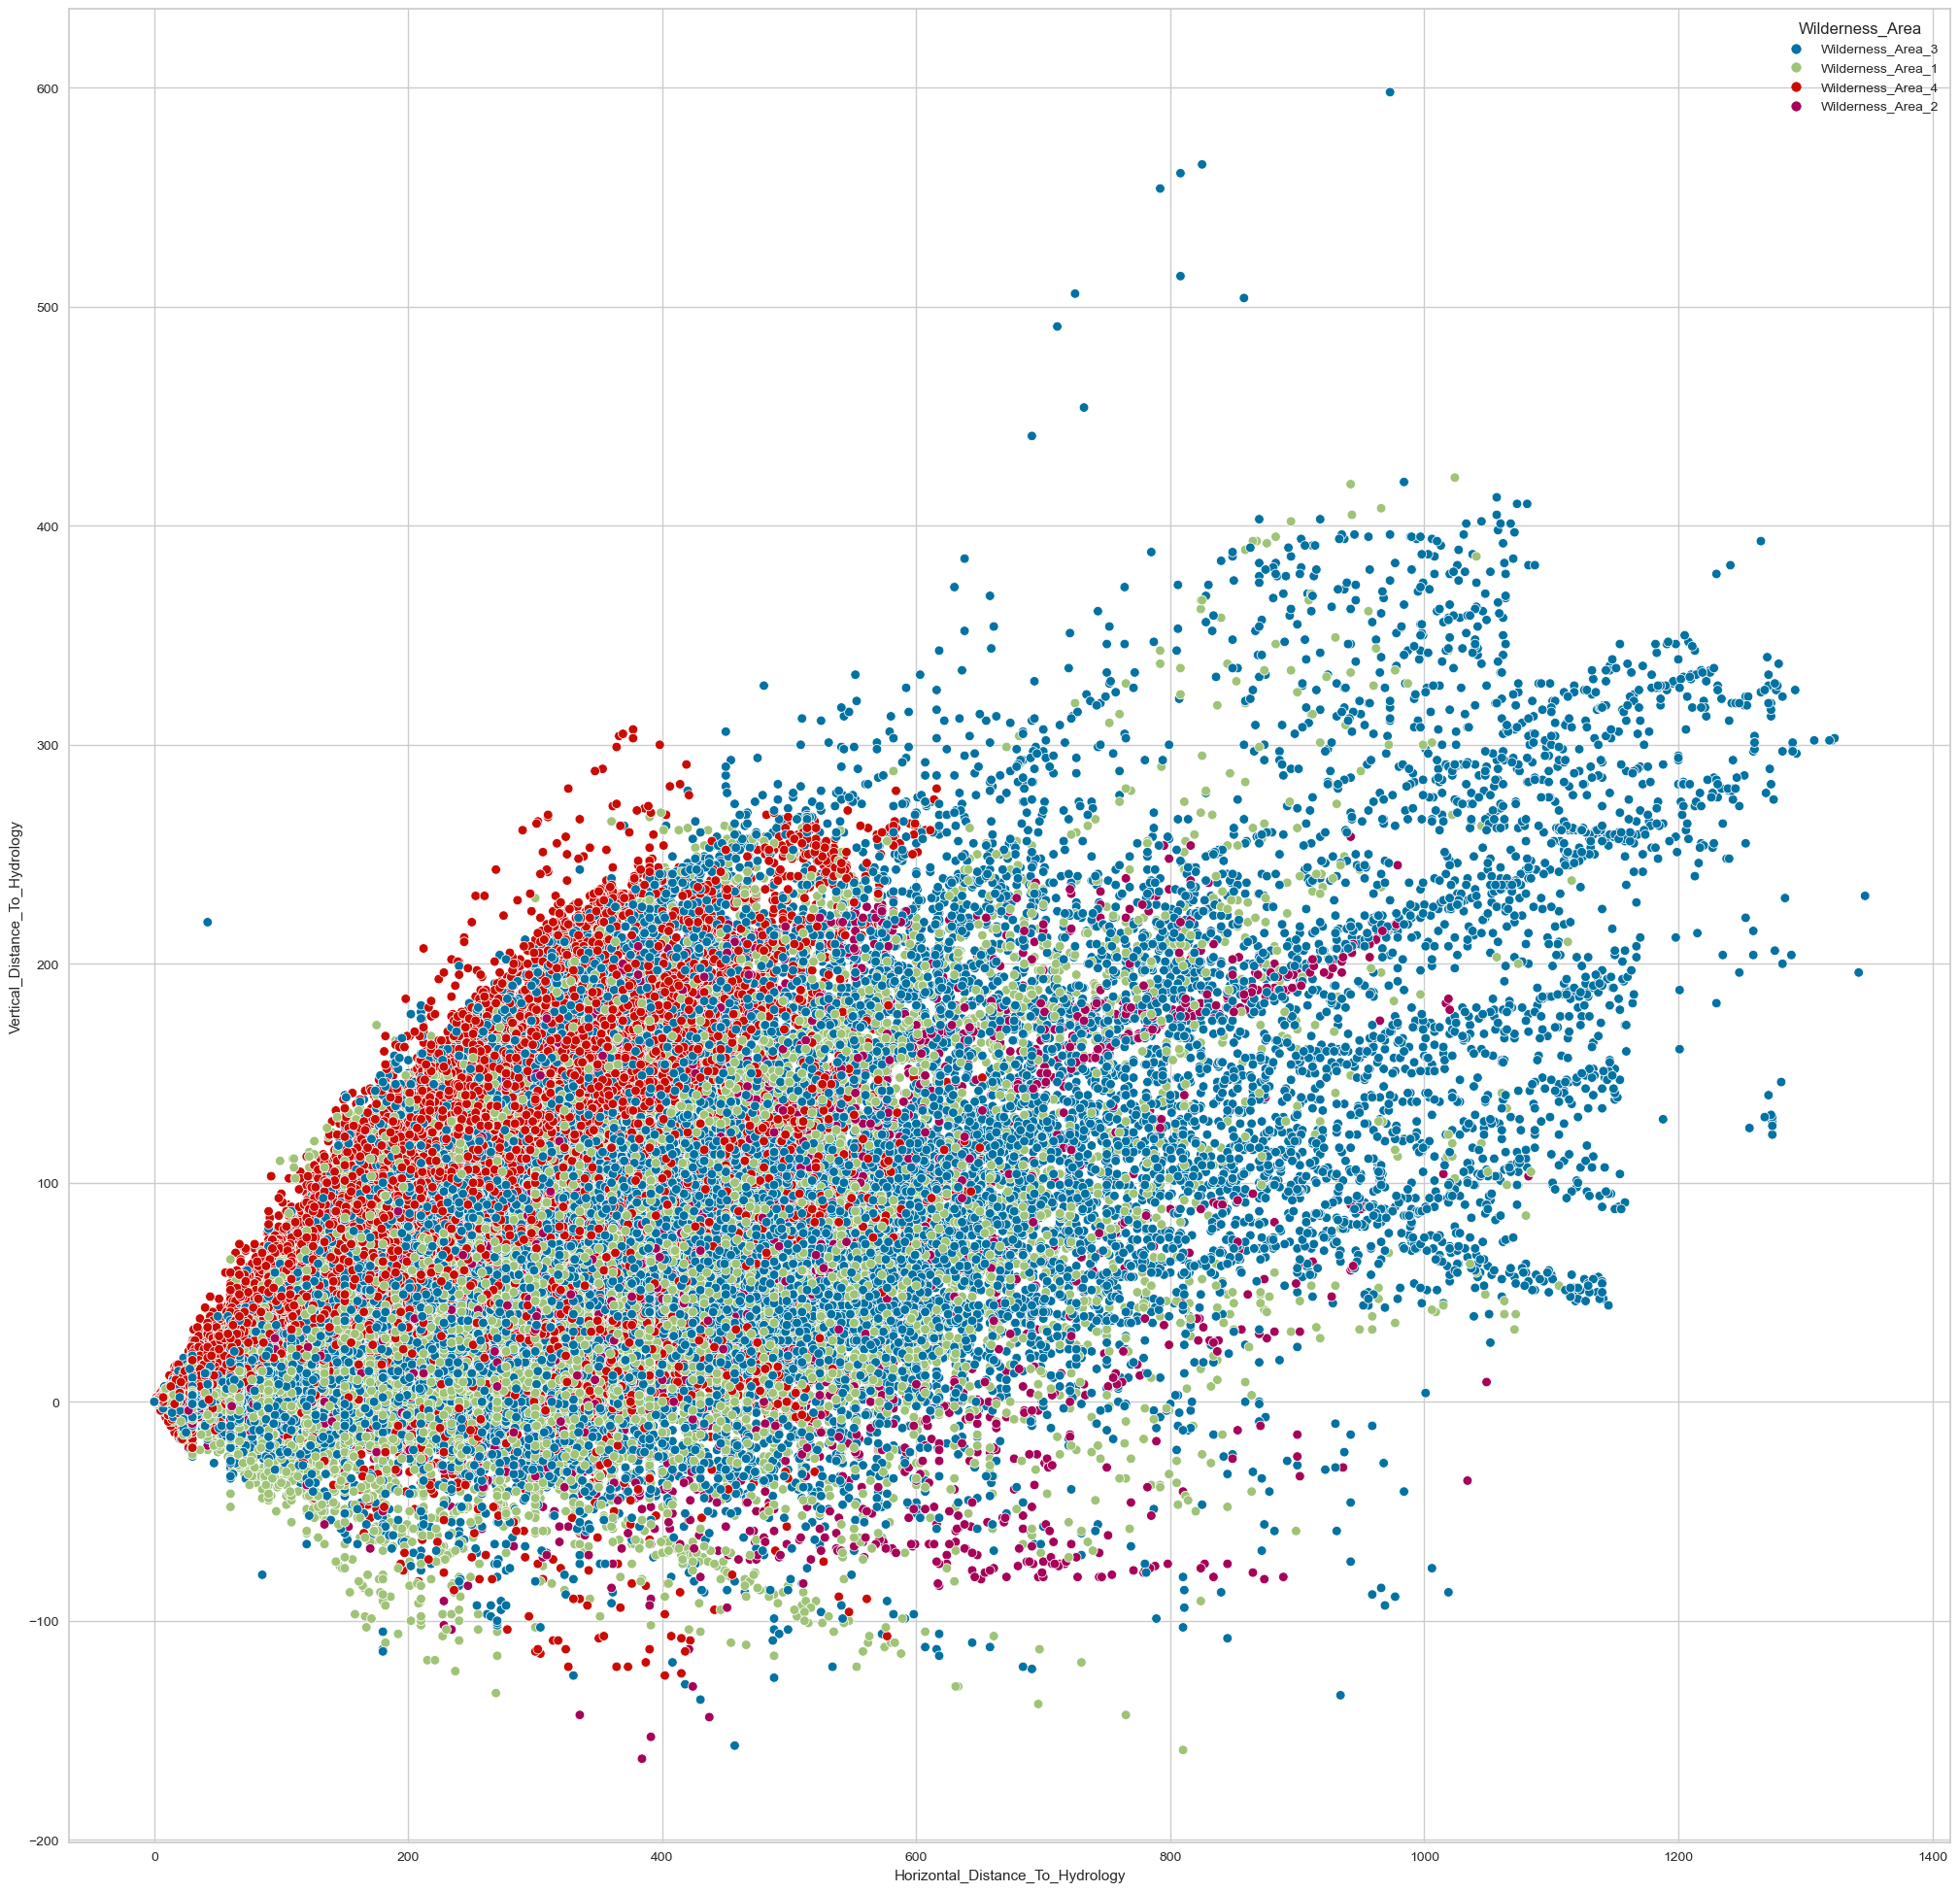

In [352]:
plt.figure(figsize=(25,25))
sns.scatterplot(x='Horizontal_Distance_To_Hydrology',y='Vertical_Distance_To_Hydrology',data=df, hue='Wilderness_Area');

In [353]:
df.Soil_Type.value_counts(dropna=False)

Soil_Type_10    18209
Soil_Type_1     16052
Soil_Type_29    12254
Soil_Type_3      8504
Soil_Type_23     6936
Soil_Type_30     6755
Soil_Type_4      6746
Soil_Type_38     6658
Soil_Type_32     5997
Soil_Type_39     5983
Soil_Type_33     5805
Soil_Type_6      5422
Soil_Type_2      5216
Soil_Type_13     4581
Soil_Type_17     4390
Soil_Type_40     3819
Soil_Type_11     3431
Soil_Type_22     3174
Soil_Type_31     2884
Soil_Type_12     2244
Soil_Type_24     2205
Soil_Type_5      1313
Soil_Type_20     1135
Soil_Type_35      949
Soil_Type_14      912
Soil_Type_16      653
Soil_Type_18      493
Soil_Type_26      484
Soil_Type_19      413
Soil_Type_37      257
Soil_Type_34      220
Soil_Type_27      121
Soil_Type_21      103
Soil_Type_28       96
Soil_Type_9        94
Soil_Type_36       58
Soil_Type_25       32
Soil_Type_8        13
Soil_Type_7         9
Soil_Type_15        1
Name: Soil_Type, dtype: int64

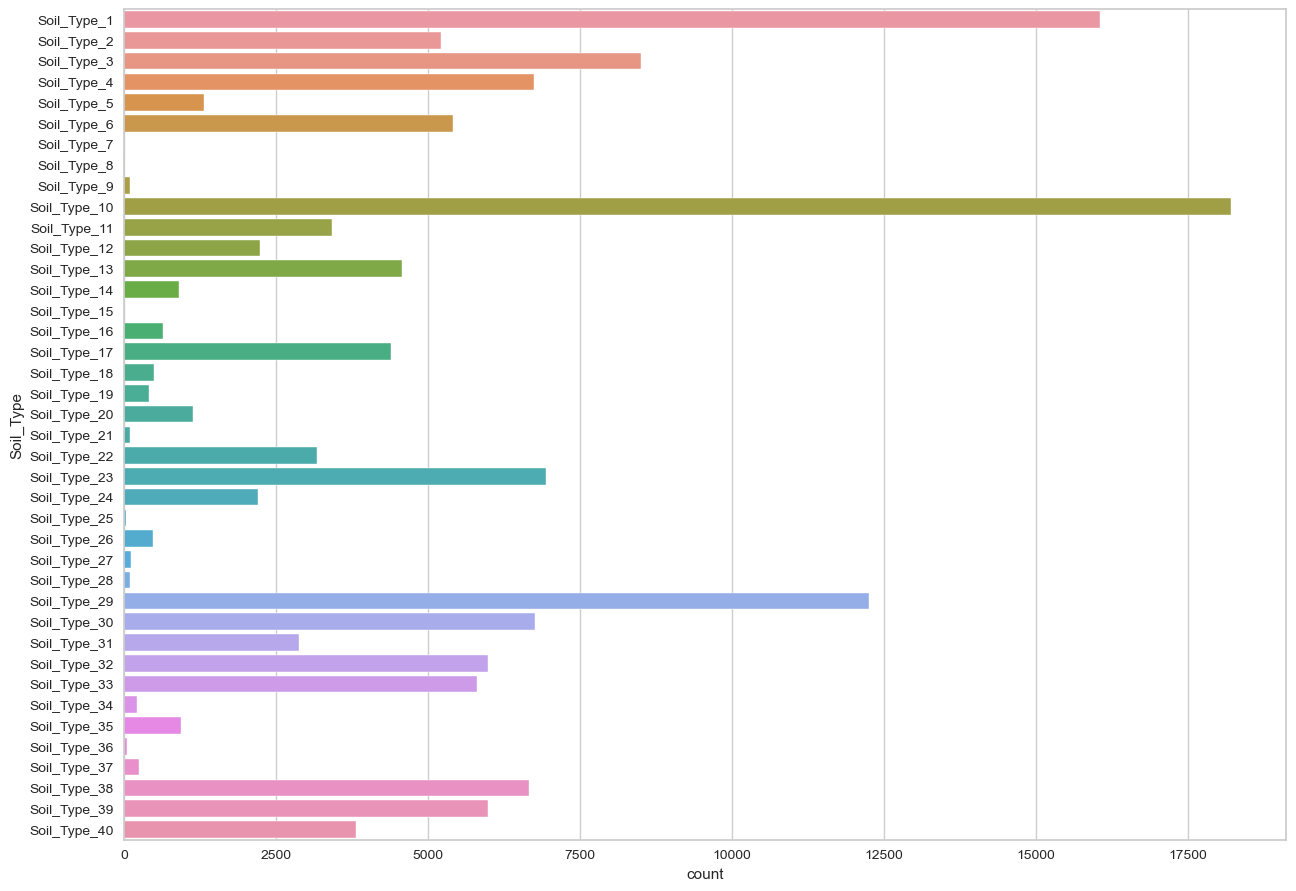

In [354]:
plt.figure(figsize=(15,11))
sns.countplot(y='Soil_Type',data=df.sort_values(by=['Soil_Type'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')));

In [355]:
df.Wilderness_Area.value_counts(dropna=False)

Wilderness_Area_3    60311
Wilderness_Area_4    44739
Wilderness_Area_1    34732
Wilderness_Area_2     4839
Name: Wilderness_Area, dtype: int64

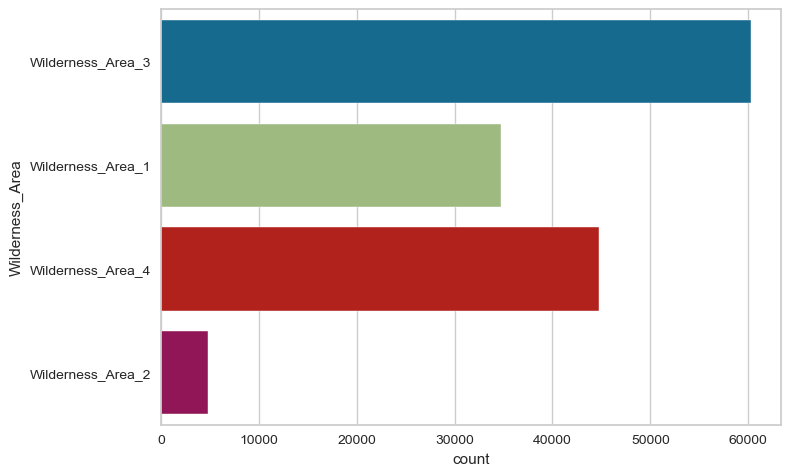

In [356]:
# plt.figure(figsize=(20,10))
sns.countplot(y='Wilderness_Area',data=df);

In [357]:
df.groupby(['Cover_Type', 'Wilderness_Area']).Elevation.describe()

count         mean         std     min  \
Cover_Type Wilderness_Area                                               
1.0        Wilderness_Area_1  10395.0  3124.510534  154.346461  2524.0   
           Wilderness_Area_2   1845.0  3232.251491  100.246857  2945.0   
           Wilderness_Area_3   8433.0  3112.638444  161.107607  2510.0   
2.0        Wilderness_Area_1  10741.0  2905.879527  169.830407  2486.0   
           Wilderness_Area_2    693.0  3211.474747   92.414019  2979.0   
           Wilderness_Area_3   9118.0  2927.513709  180.233088  2328.0   
           Wilderness_Area_4    219.0  2464.570776  101.677076  2142.0   
3.0        Wilderness_Area_1     67.0  2454.791045   90.689871  2327.0   
           Wilderness_Area_3   8054.0  2575.192948  104.384484  2271.0   
           Wilderness_Area_4  12409.0  2274.004674  145.485634  1859.0   
4.0        Wilderness_Area_4  20601.0  2223.449444  101.910089  1988.0   
5.0        Wilderness_Area_1   8311.0  2767.444351   95.796537  2483.0   
           Wilderness_Area_3  12561.0  2799.452989   94.495813  2526.0   
6.0        Wilderness_Area_1     93.0  2431.698925   49.303582  2362.0   
           Wilderness_Area_3   9027.0  2568.988922  113.476401  2328.0   
           Wilderness_Area_4  11510.0  2300.460643  149.038282  1873.0   
7.0        Wilderness_Area_1   5124.0  3309.248048   79.697591  3107.0   
           Wilderness_Area_2   2301.0  3443.507171   77.768500  3266.0   
           Wilderness_Area_3  13118.0  3366.709483  108.912841  2868.0   

                                 25%     50%     75%     max  
Cover_Type Wilderness_Area                                    
1.0        Wilderness_Area_1  3029.0  3134.0  3226.0  3680.0  
           Wilderness_Area_2  3165.0  3224.0  3303.0  3473.0  
           Wilderness_Area_3  3020.0  3132.0  3225.0  3457.0  
2.0        Wilderness_Area_1  2785.0  2926.0  3014.0  3324.0  
           Wilderness_Area_2  3141.0  3228.0  3282.0  3425.0  
           Wilderness_Area_3  2806.0  2940.0  3051.0  3406.0  
           Wilderness_Area_4  2423.5  2494.0  2531.0  2645.0  
3.0        Wilderness_Area_1  2382.0  2429.0  2541.5  2636.0  
           Wilderness_Area_3  2506.0  2576.0  2641.0  2897.0  
           Wilderness_Area_4  2167.0  2294.0  2384.0  2628.0  
4.0        Wilderness_Area_4  2140.0  2232.0  2303.0  2525.0  
5.0        Wilderness_Area_1  2721.0  2766.0  2818.0  2976.0  
           Wilderness_Area_3  2745.0  2817.0  2868.0  3010.0  
6.0        Wilderness_Area_1  2398.0  2415.0  2444.0  2596.0  
           Wilderness_Area_3  2488.0  2565.0  2646.0  2898.0  
           Wilderness_Area_4  2213.0  2337.0  2417.0  2561.0  
7.0        Wilderness_Area_1  3250.0  3305.0  3370.0  3613.0  
           Wilderness_Area_2  3395.0  3429.0  3496.0  3644.0  
           Wilderness_Area_3  3313.0  3366.0  3405.0  3857.0

In [358]:
df[["Elevation", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

Cover_Type    Elevation
0         1.0  3129.283171
1         2.0  2920.919311
2         3.0  2392.752021
3         4.0  2223.449444
4         5.0  2786.707503
5         6.0  2418.551285
6         7.0  3360.979020

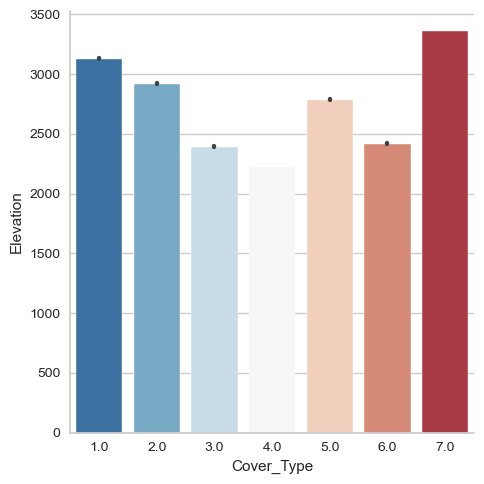

In [359]:
sns.factorplot(x="Cover_Type", y ="Elevation", data=df, kind="bar", palette='RdBu_r',size=5);

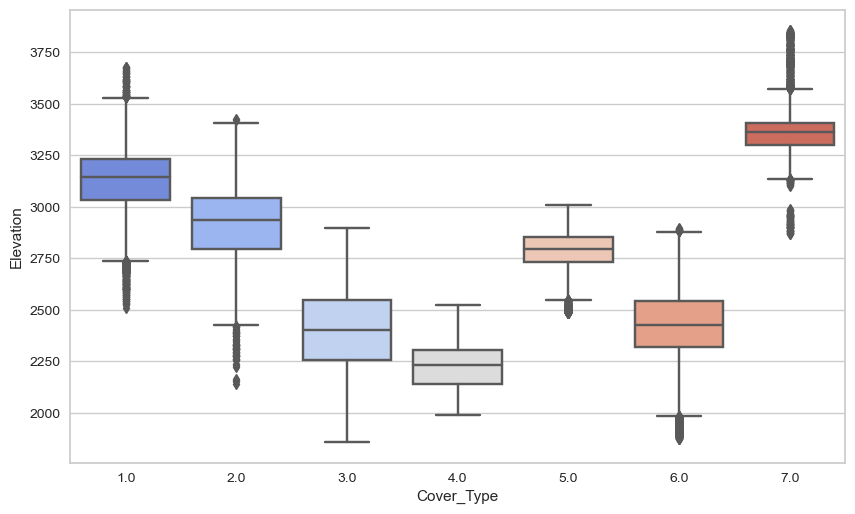

In [251]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette="coolwarm");

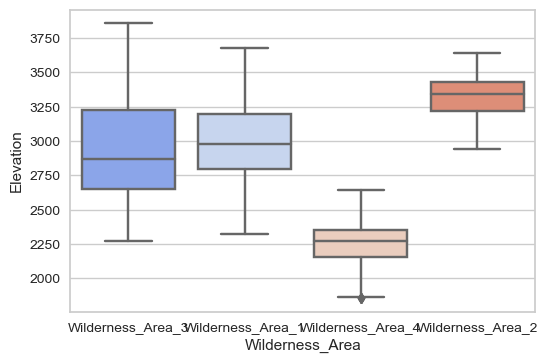

In [252]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Wilderness_Area', y='Elevation', data=df, palette="coolwarm");

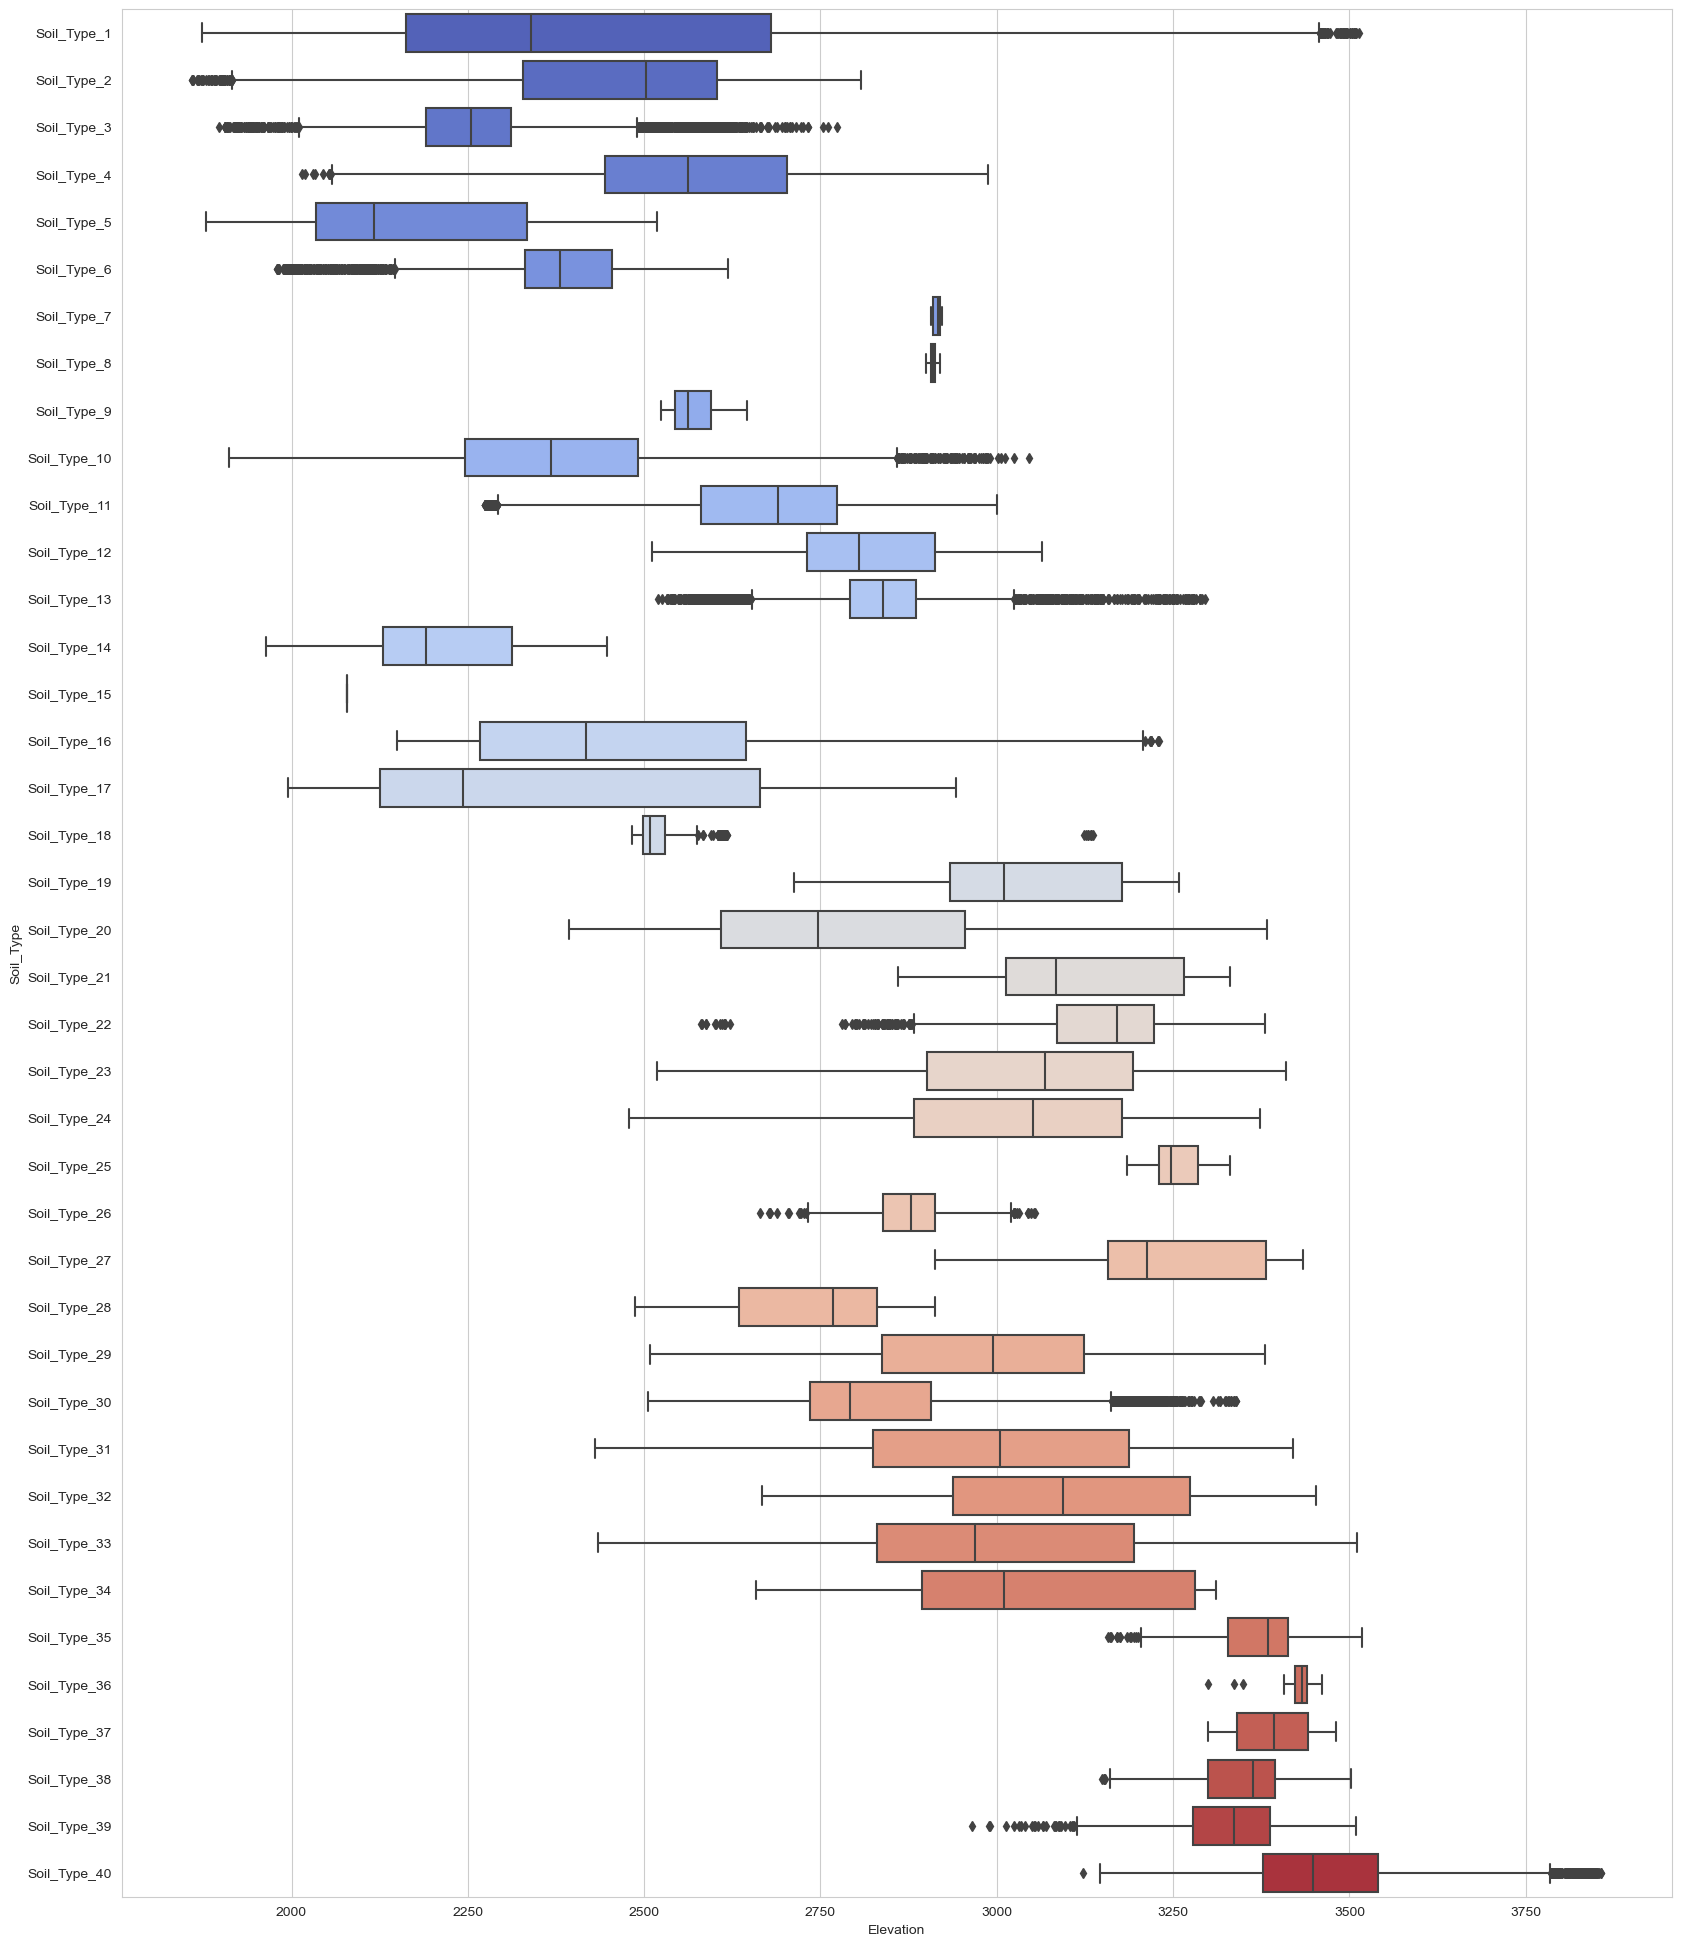

In [42]:
plt.figure(figsize=(20,25))
sns.boxplot(y='Soil_Type', x='Elevation', data=df.sort_values(by=['Soil_Type'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')), orient="h",palette="coolwarm");

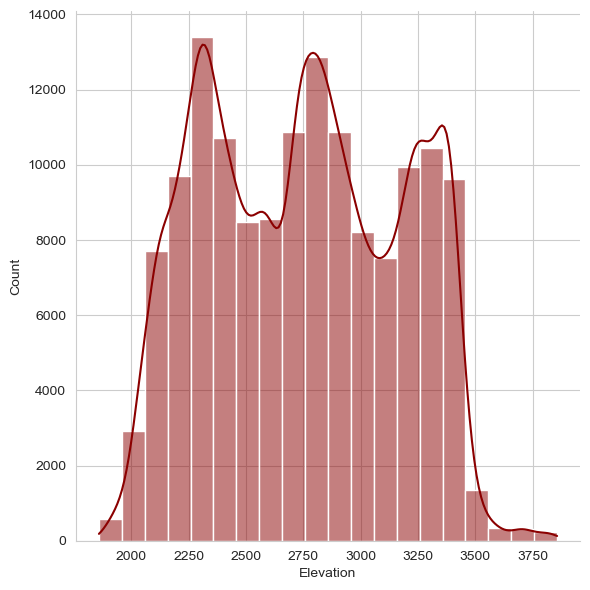

In [43]:
# plt.figure(figsize=(15,15))
sns.displot(df['Elevation'].dropna(), kde=True, height= 6, color='darkred', bins=20);

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [360]:
df.isnull().sum()*100 / df.shape[0]

Elevation                             0.000000
Aspect                                0.000000
Slope                                 0.000000
Horizontal_Distance_To_Hydrology      0.000000
Vertical_Distance_To_Hydrology        0.000000
Horizontal_Distance_To_Roadways       0.000000
Hillshade_9am                         0.000000
Hillshade_Noon                        0.000000
Hillshade_3pm                         0.000000
Horizontal_Distance_To_Fire_Points    0.000000
Cover_Type                            0.000691
Wilderness_Area                       0.000000
Soil_Type                             0.000000
dtype: float64

In [361]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [362]:
first_looking('Cover_Type')

column name    :  Cover_Type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  7
--------------------------------
5.0    20872
2.0    20771
1.0    20673
6.0    20630
4.0    20601
7.0    20543
3.0    20530
NaN        1
Name: Cover_Type, dtype: int64


In [363]:
df[df['Cover_Type'].isna()]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
144620       3152     156     15                               108   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
144620                              14                             2150   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
144620            235             240            131   

        Horizontal_Distance_To_Fire_Points  Cover_Type    Wilderness_Area  \
144620                                2716         NaN  Wilderness_Area_1   

          Soil_Type  
144620  Soil_Type_1

In [364]:
df['Cover_Type'].fillna(df.groupby(['Vertical_Distance_To_Hydrology','Slope'])['Cover_Type'].transform(lambda x : x.mode()[0]),inplace=True)

In [365]:
df.iloc[[144620]]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
144620       3152     156     15                               108   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
144620                              14                             2150   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
144620            235             240            131   

        Horizontal_Distance_To_Fire_Points  Cover_Type    Wilderness_Area  \
144620                                2716         1.0  Wilderness_Area_1   

          Soil_Type  
144620  Soil_Type_1

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [366]:
df.shape

(144621, 13)

In [367]:
df.corr()["Cover_Type"].sort_values(ascending=False)

Cover_Type                            1.000000
Vertical_Distance_To_Hydrology        0.080703
Slope                                 0.076015
Elevation                             0.012030
Horizontal_Distance_To_Hydrology      0.008717
Aspect                                0.004719
Hillshade_9am                        -0.016692
Hillshade_3pm                        -0.055265
Horizontal_Distance_To_Fire_Points   -0.090694
Hillshade_Noon                       -0.104553
Horizontal_Distance_To_Roadways      -0.111130
Name: Cover_Type, dtype: float64

In [368]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Wilderness_Area',
       'Soil_Type'],
      dtype='object')

In [369]:
def col_plot(df,col_name):
    plt.figure(figsize=(15,6))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name]) # IQR katsayisi, defaultu 1.5
    plt.xlabel("IQR=1.5")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = 2.5)
    plt.xlabel("ROOT SQUARE - IQR=2.5")

    plt.subplot(144)
    plt.boxplot(np.log(df[col_name]+0.1), whis = 2.5)
    plt.xlabel("LOGARITMIC - IQR=2.5")
    plt.show()

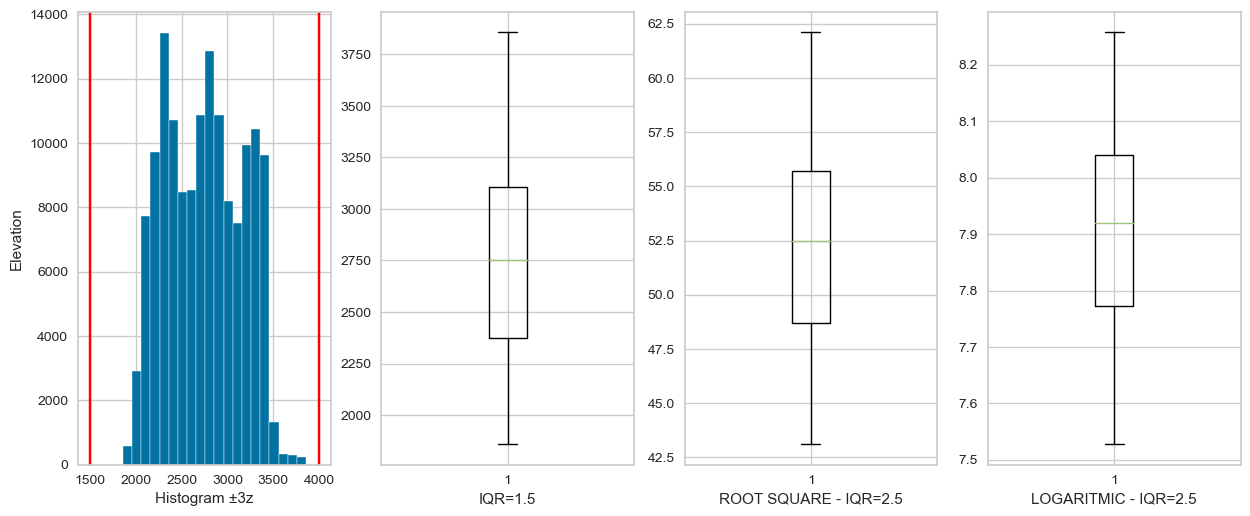

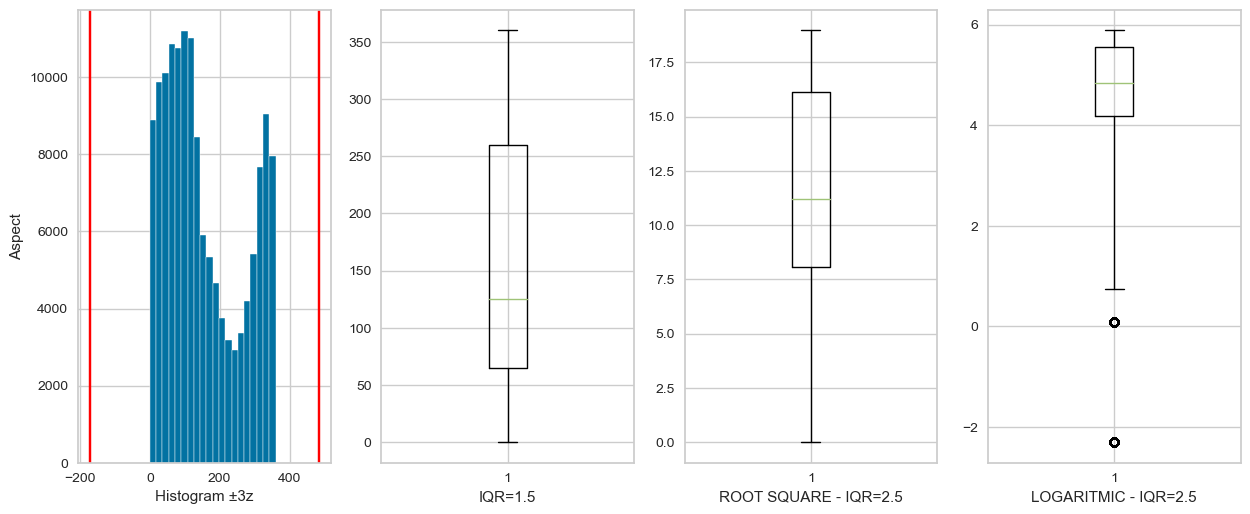

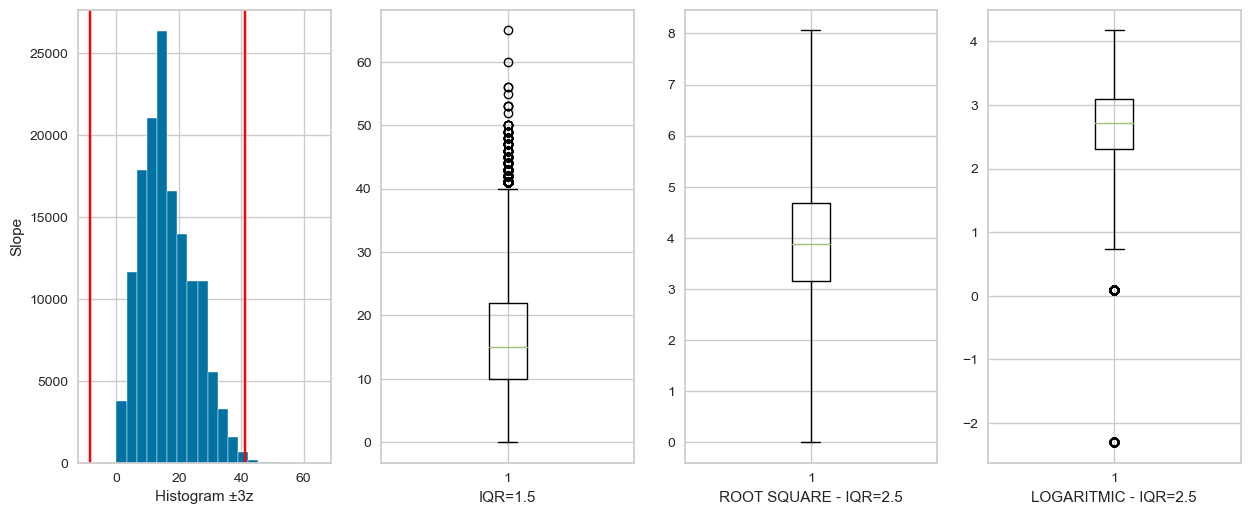

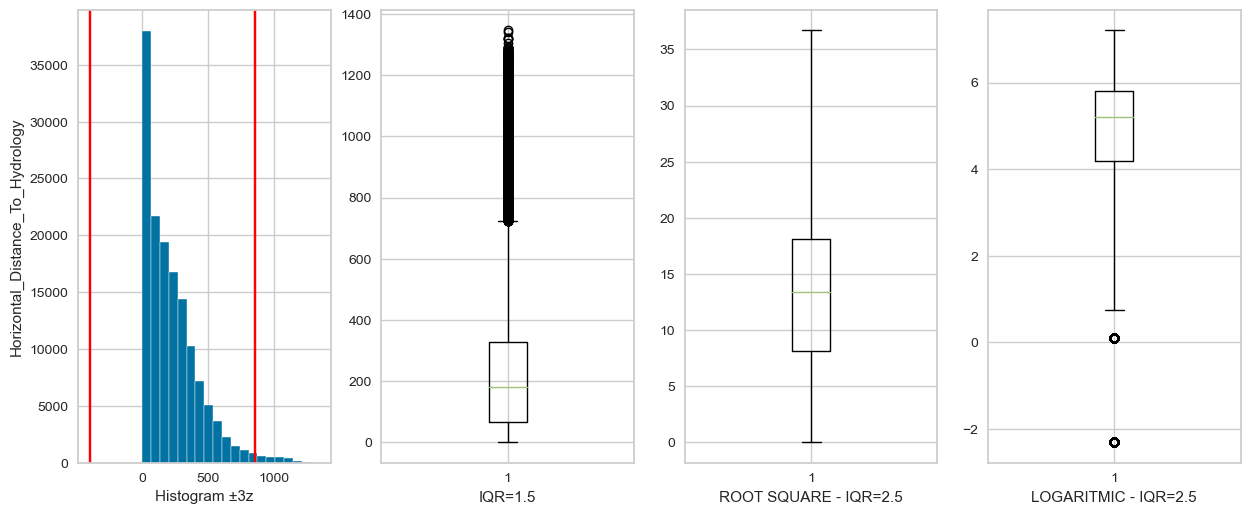

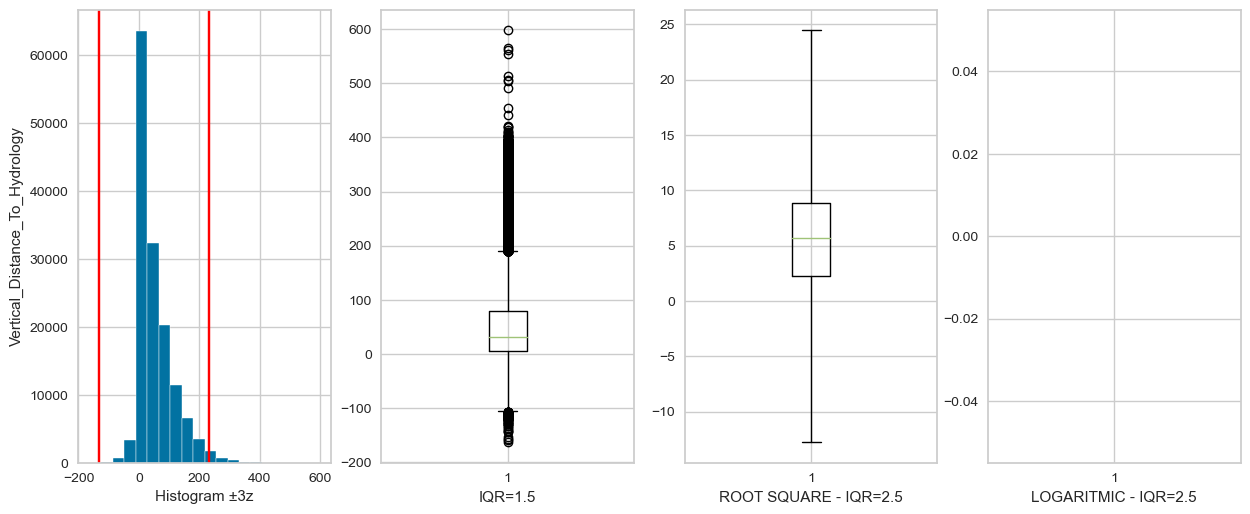

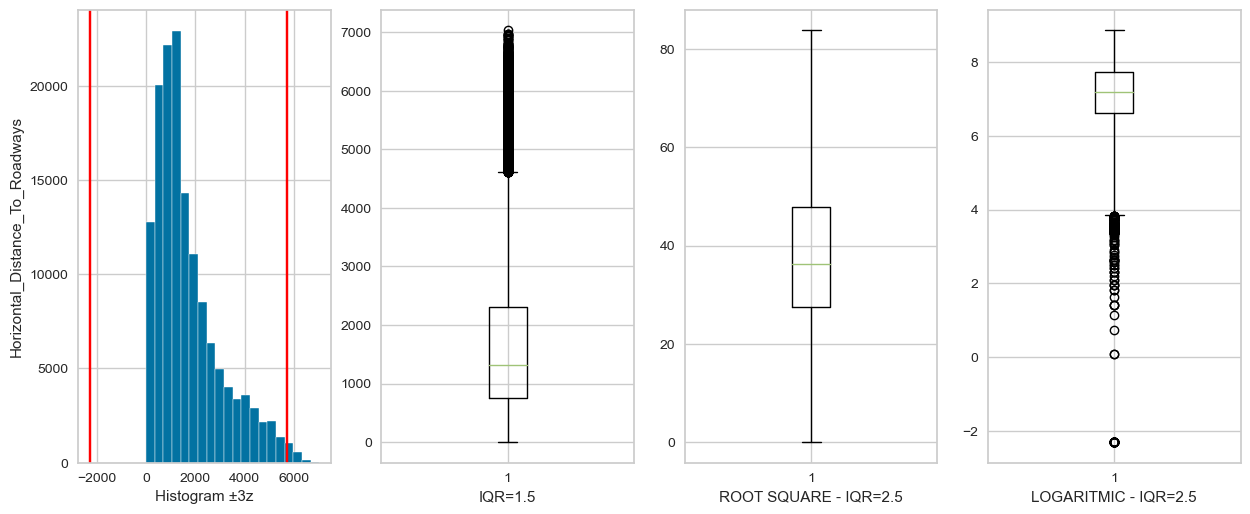

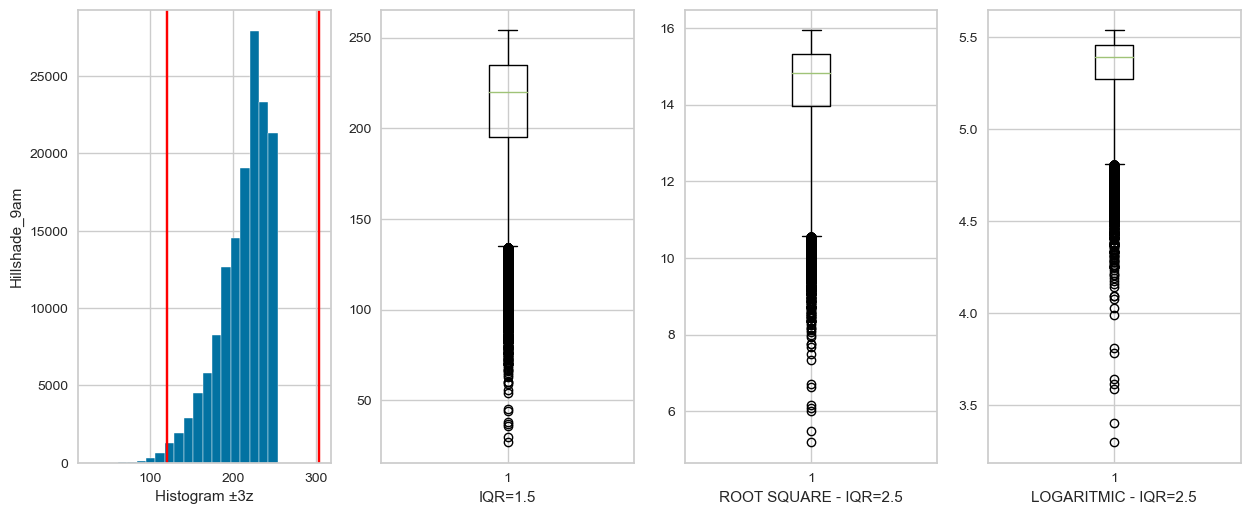

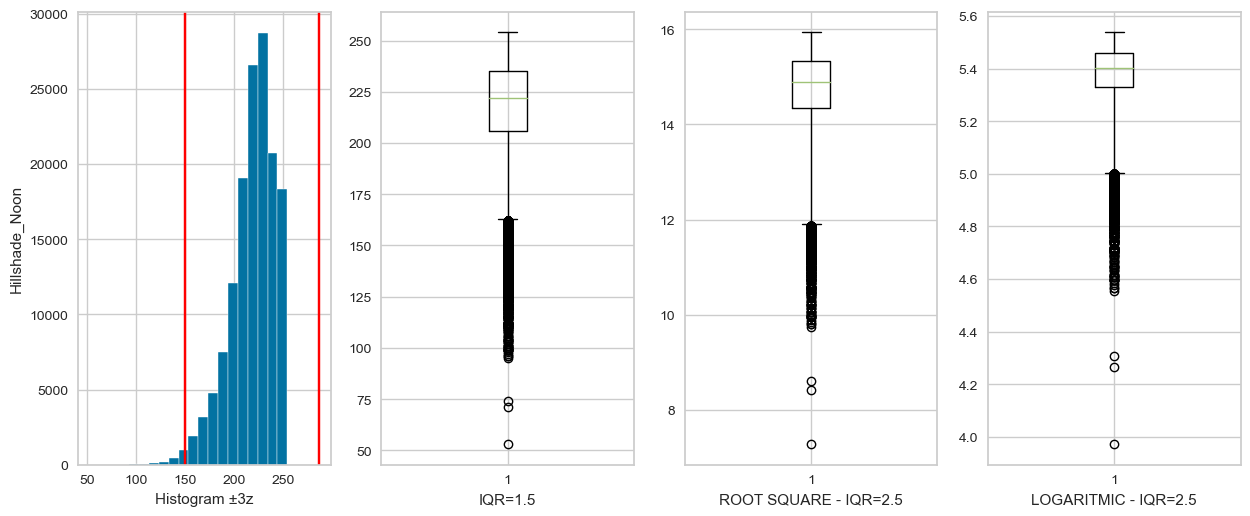

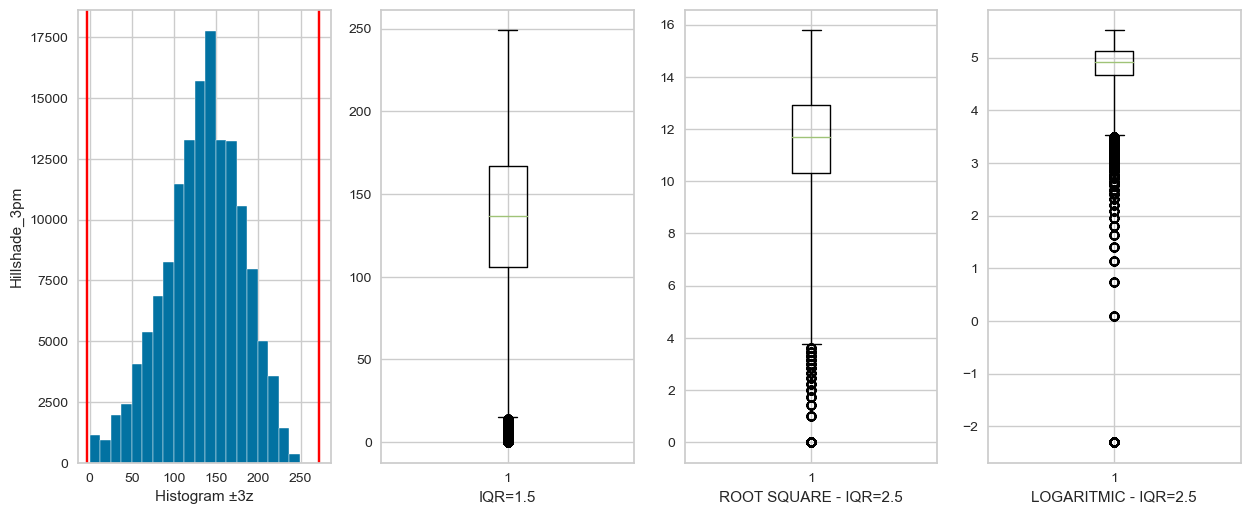

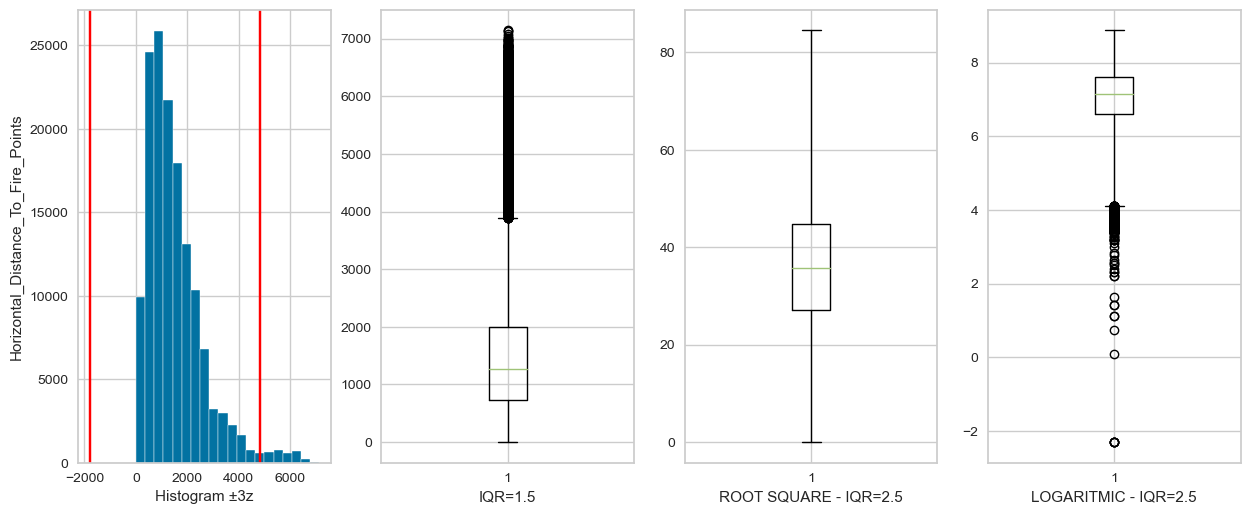

In [370]:
for i in df.columns[:-3]:
    col_plot(df,i)

In [264]:
from scipy.stats.mstats import winsorize

def plot_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    logr=np.log(df[col_name]+0.1)

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(logr, bins=22)
    plt.axvline(x=logr.mean()+3*logr.std(),color='red')
    plt.axvline(x=logr.mean()-3*logr.std(),color='red')
    plt.xlabel('Logr_col_name')

    plt.subplot(144)
    plt.boxplot(logr, whis = 1.5)
    plt.xlabel("Logaritmic - IQR=1.5")
    plt.show()    


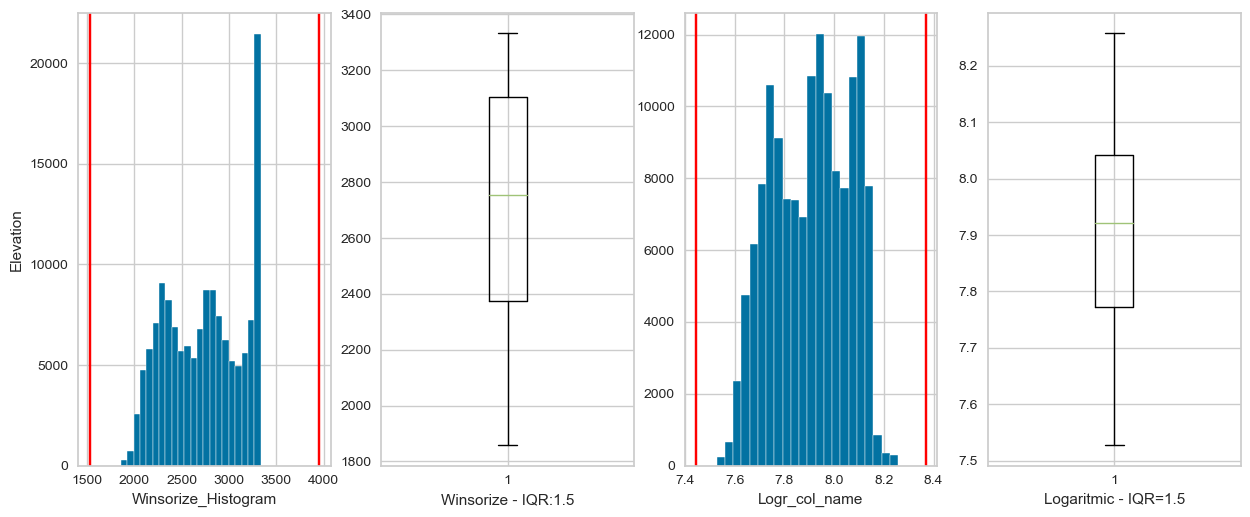

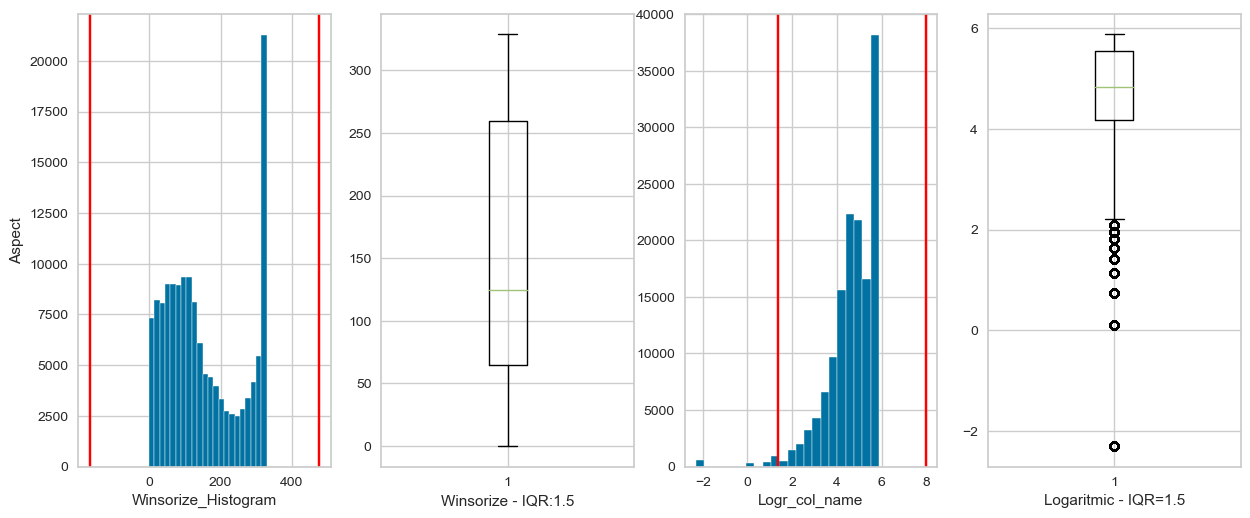

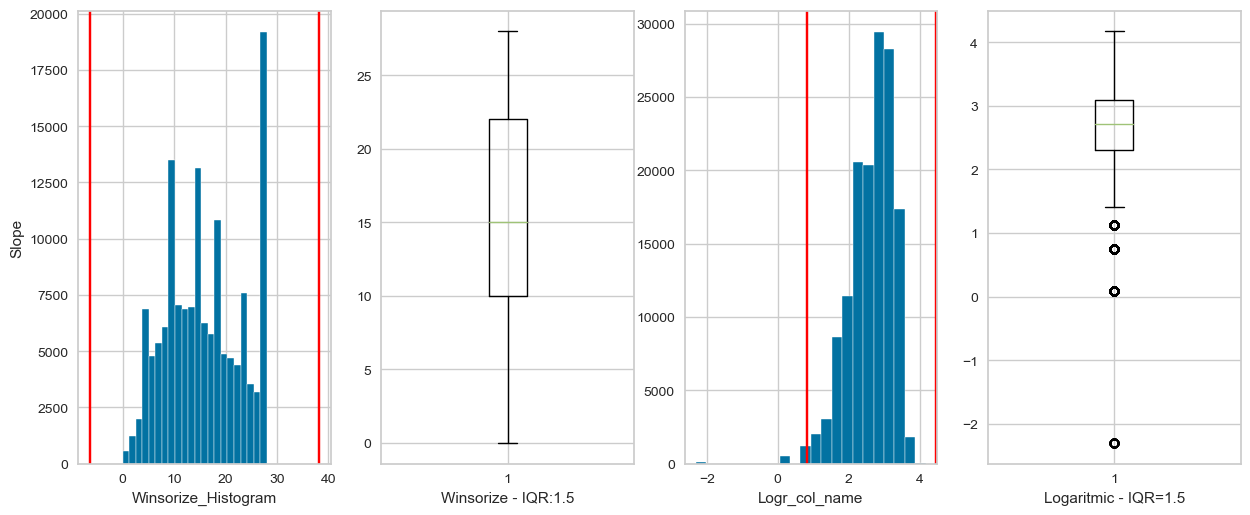

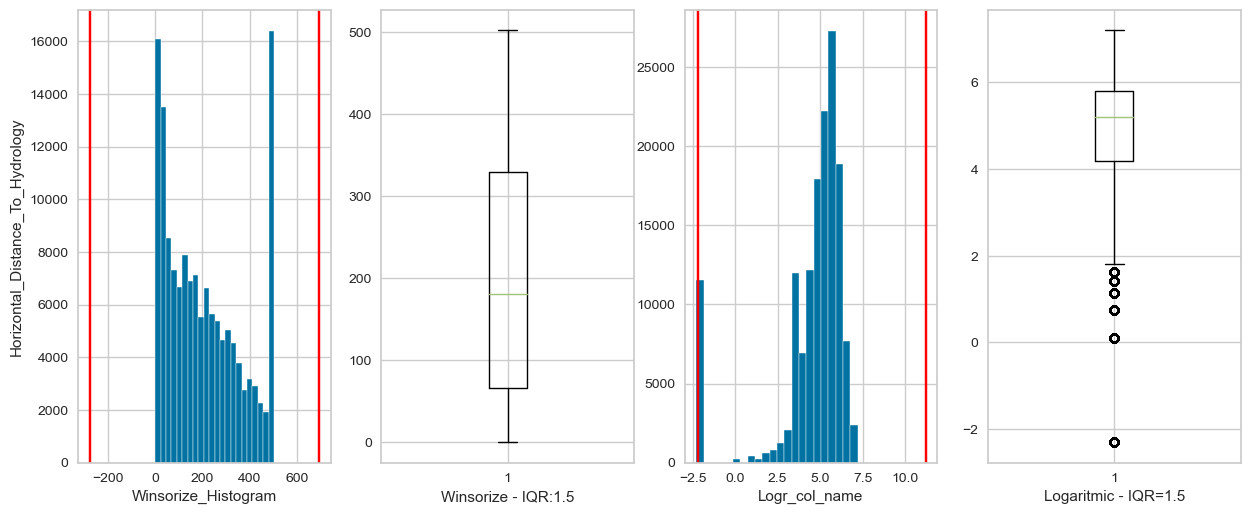

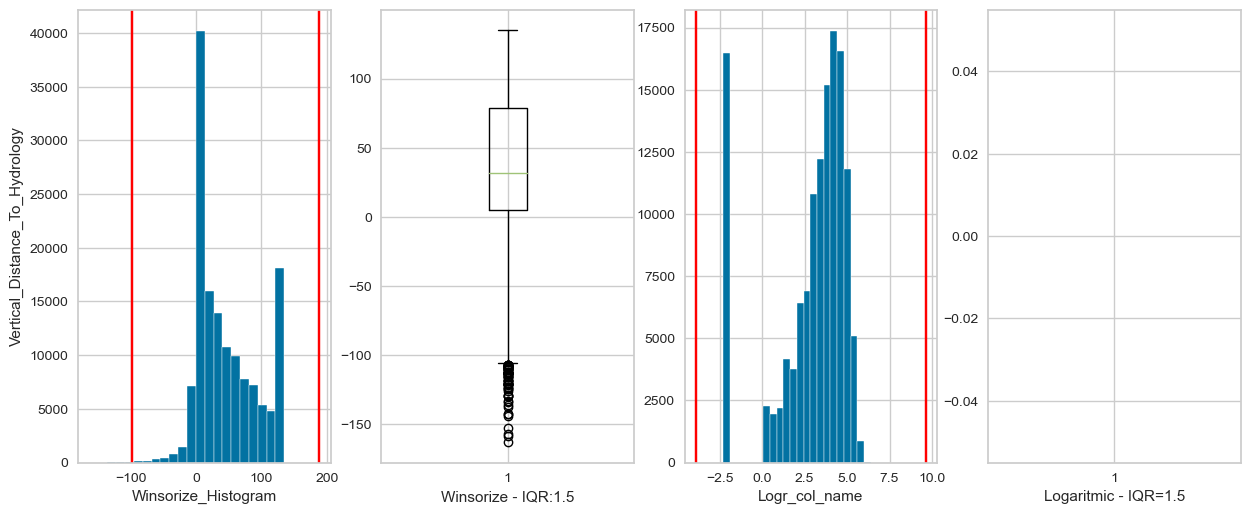

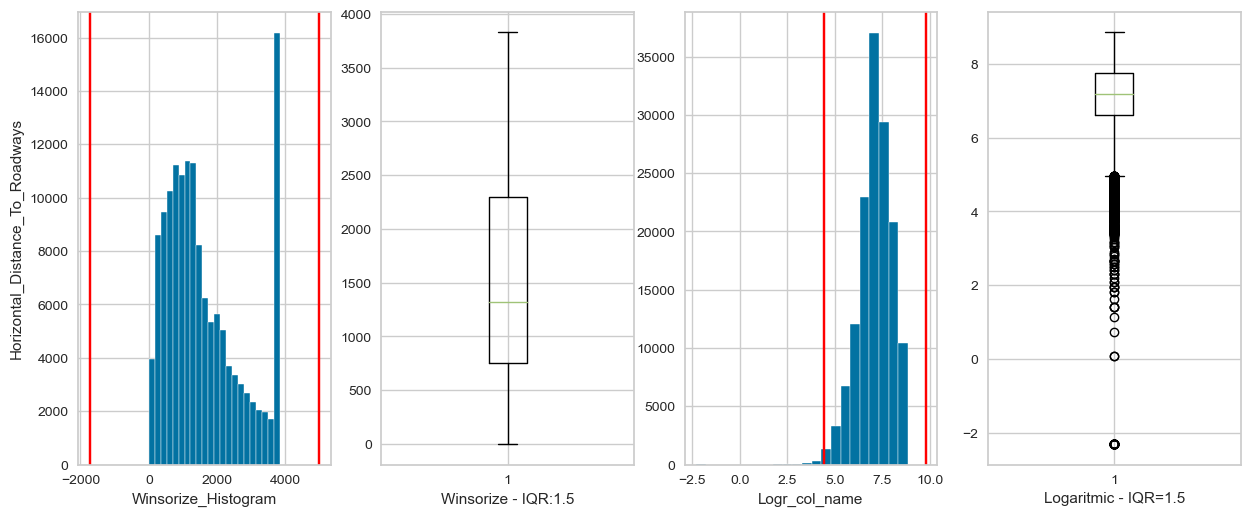

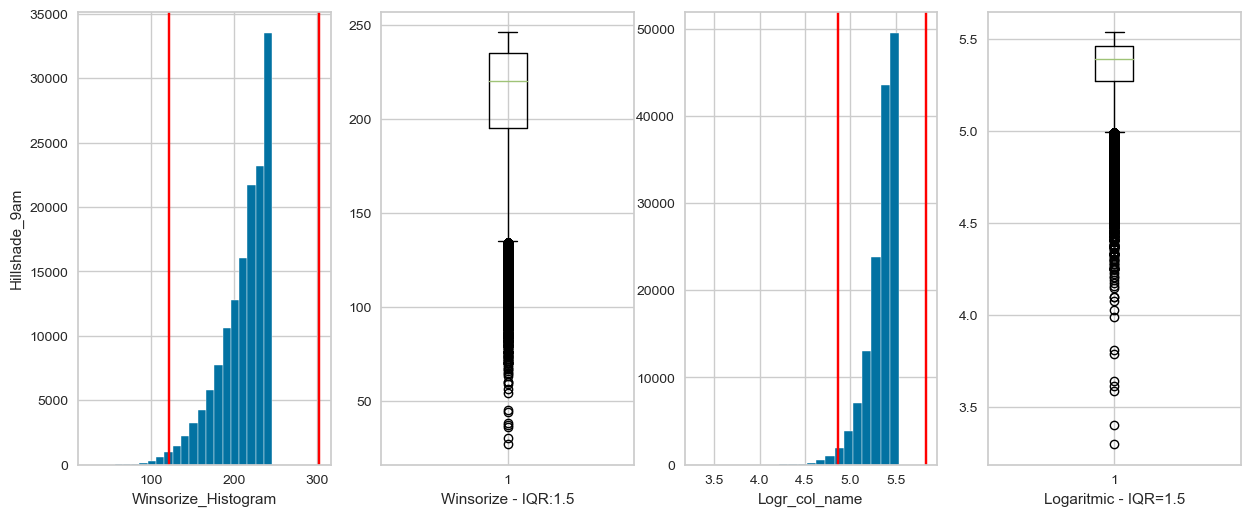

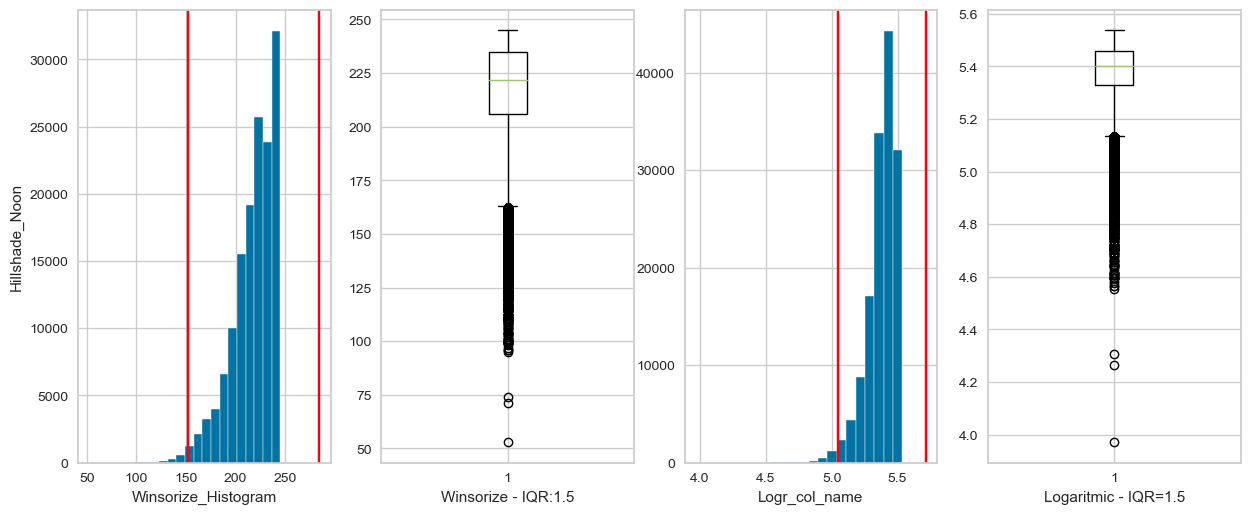

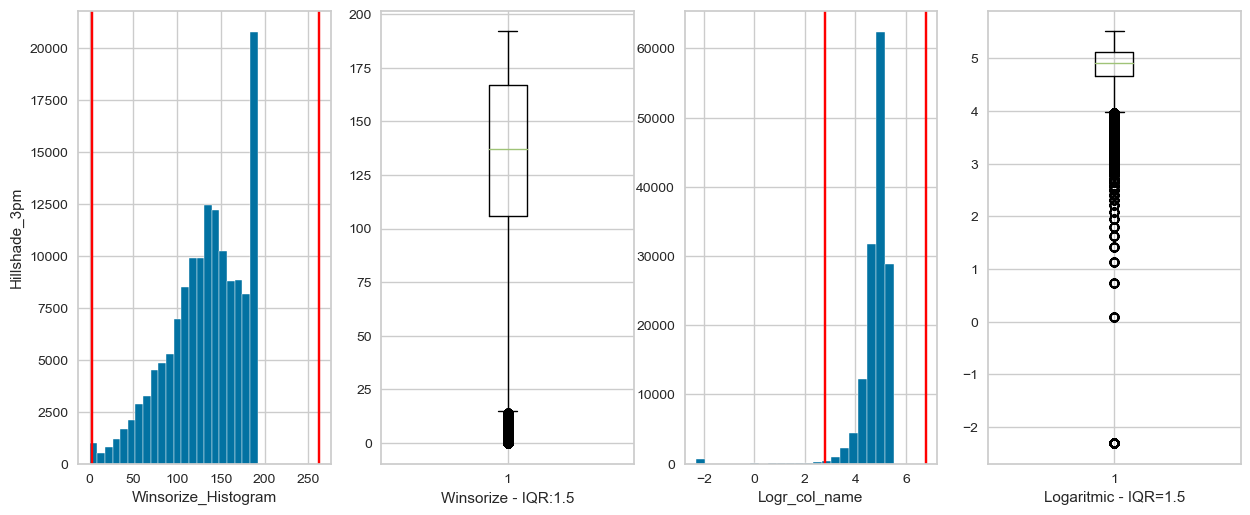

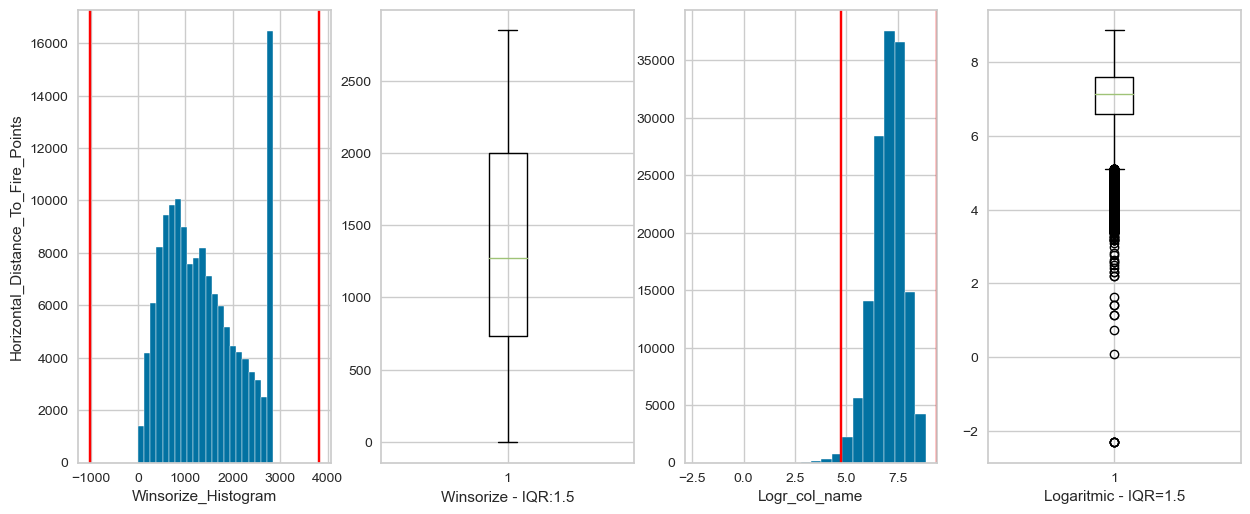

In [265]:
for i in df.columns[:-3]:
    plot_winsorize(df,i)

In [371]:
features=['Elevation', 
#            'Aspect', # angle
           'Slope', 
           'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways', # not expected normal distribution
#            'Hillshade_9am', # bitwise
#            'Hillshade_Noon',
#            'Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points']

In [372]:
df_winsorised=df.copy()
for i in features:
    df_winsorised[i]=winsorize(df_winsorised[i], (0,0.1))

In [373]:
df_log=df.copy()
for i in features:
    df_log[i]=np.log(df_log[i])

In [374]:
df_root=df.copy()
f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
for i in features:
    df_root[i]=df_root[i].apply(f)

### Deal with Outliers

In [375]:
from numpy import percentile
from scipy.stats import zscore
from scipy import stats

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [376]:
from scipy.stats import zscore
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
   
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    
    plt.subplot(1,3,1)
    plt.axvline(x=df[col].mean() + z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.axvline(x=df[col].mean() - z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.show()
    
    return z_score_inspect

In [377]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [378]:
print("Number of Outliers for k*IQR\n")
k=3

total=0
for col in features:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for k*IQR

2 outliers in 'Slope'
436 outliers in 'Horizontal_Distance_To_Hydrology'
536 outliers in 'Vertical_Distance_To_Hydrology'
7 outliers in 'Horizontal_Distance_To_Roadways'
1401 outliers in 'Horizontal_Distance_To_Fire_Points'

2382 OUTLIERS TOTALLY


In [379]:
k=2
print(f"Number of Outliers for {k}*IQR after Winsorised\n")

total=0
for col in features:
    if detect_outliers(df_winsorised, col)[2] > 0:
        outliers=detect_outliers(df_winsorised, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Winsorised

5 outliers in 'Vertical_Distance_To_Hydrology'

5 OUTLIERS TOTALLY


In [380]:
k=2.2
print(f"Number of Outliers for {k}*IQR after Root Square\n")

total=0
for col in features:
    if detect_outliers(df_root, col)[2] > 0:
        outliers=detect_outliers(df_root, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2.2*IQR after Root Square

1 outliers in 'Slope'
0 outliers in 'Horizontal_Distance_To_Hydrology'
7 outliers in 'Vertical_Distance_To_Hydrology'
0 outliers in 'Horizontal_Distance_To_Roadways'
12 outliers in 'Horizontal_Distance_To_Fire_Points'

20 OUTLIERS TOTALLY


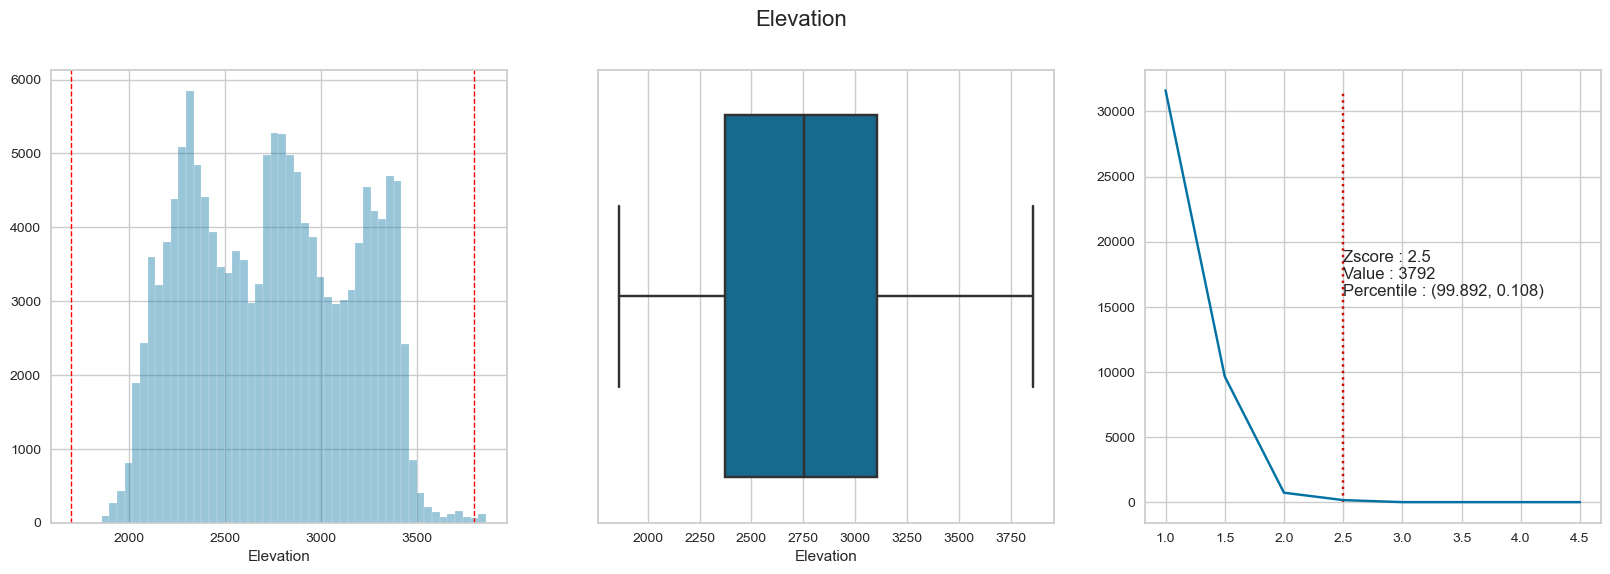

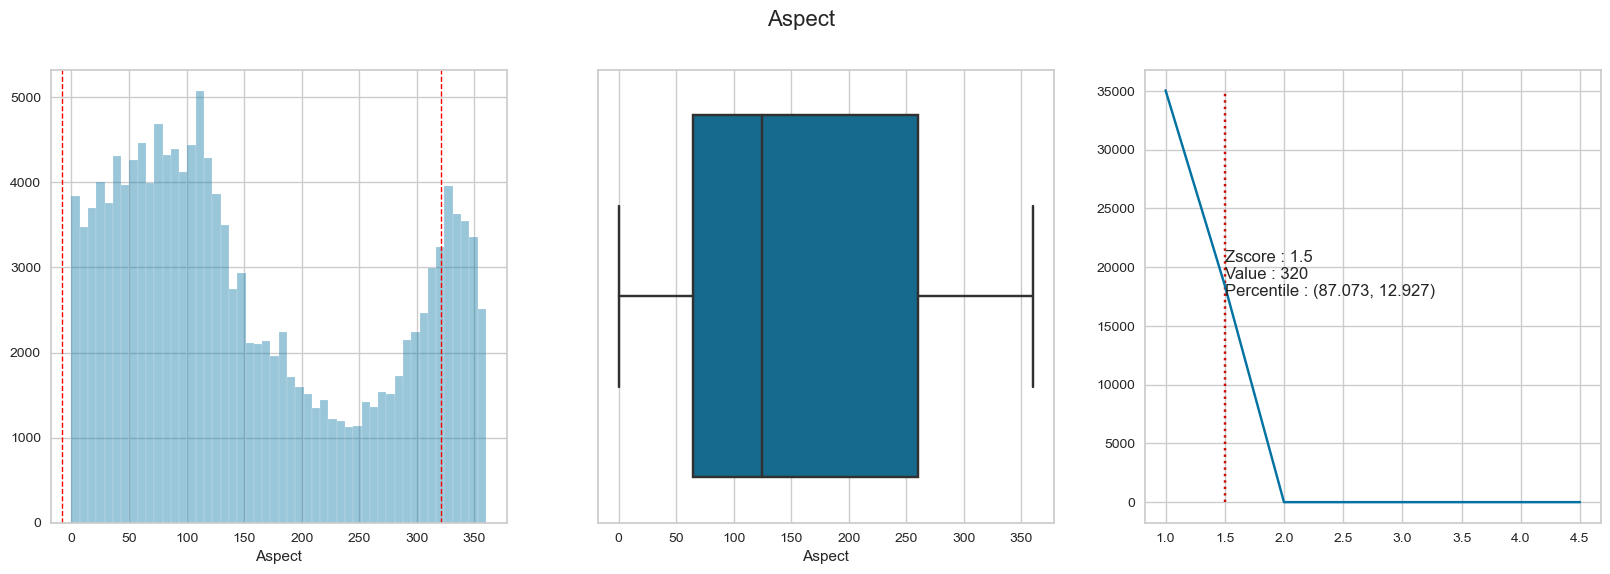

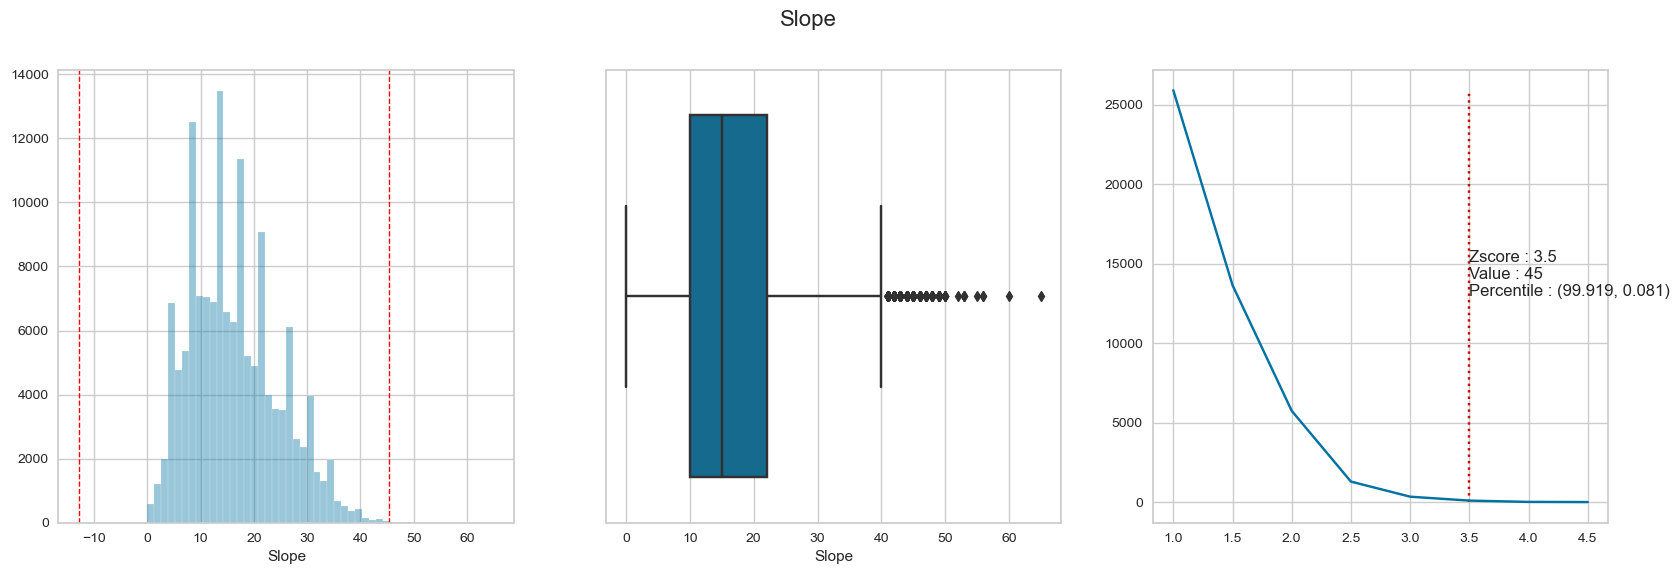

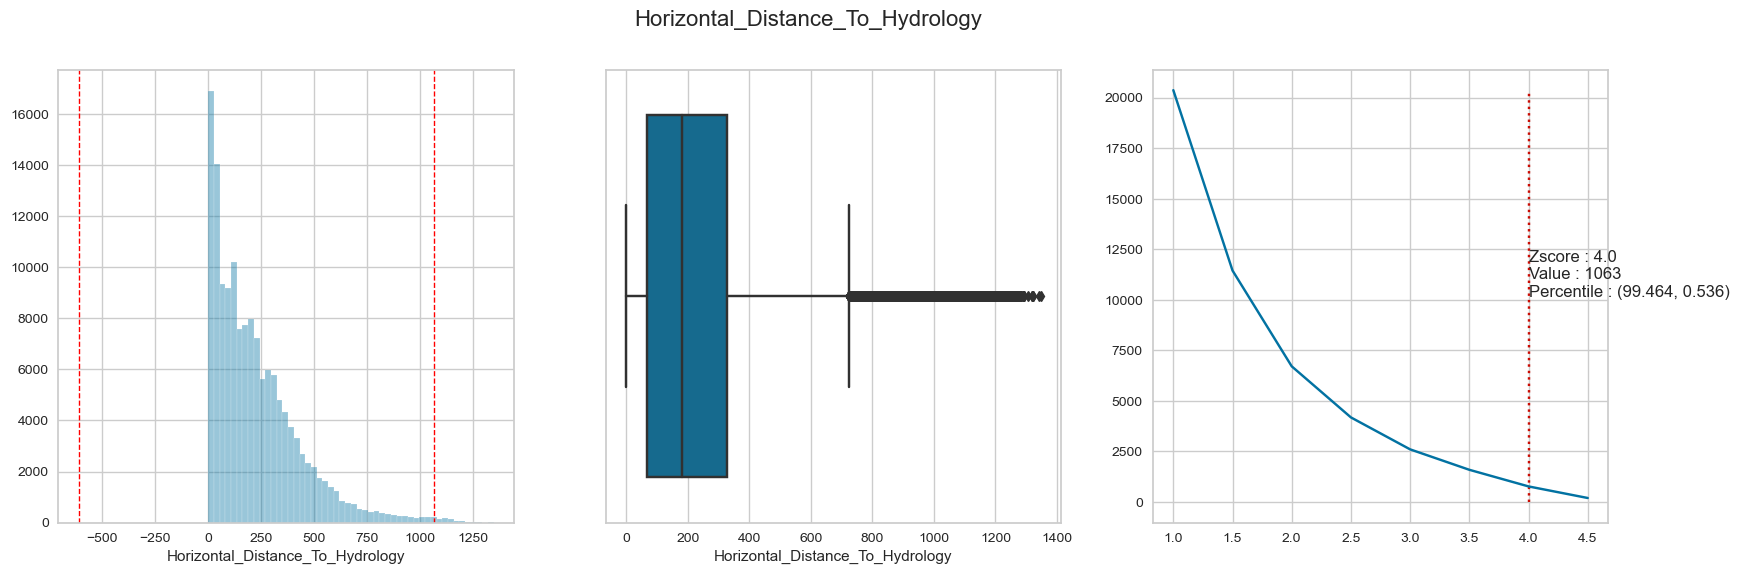

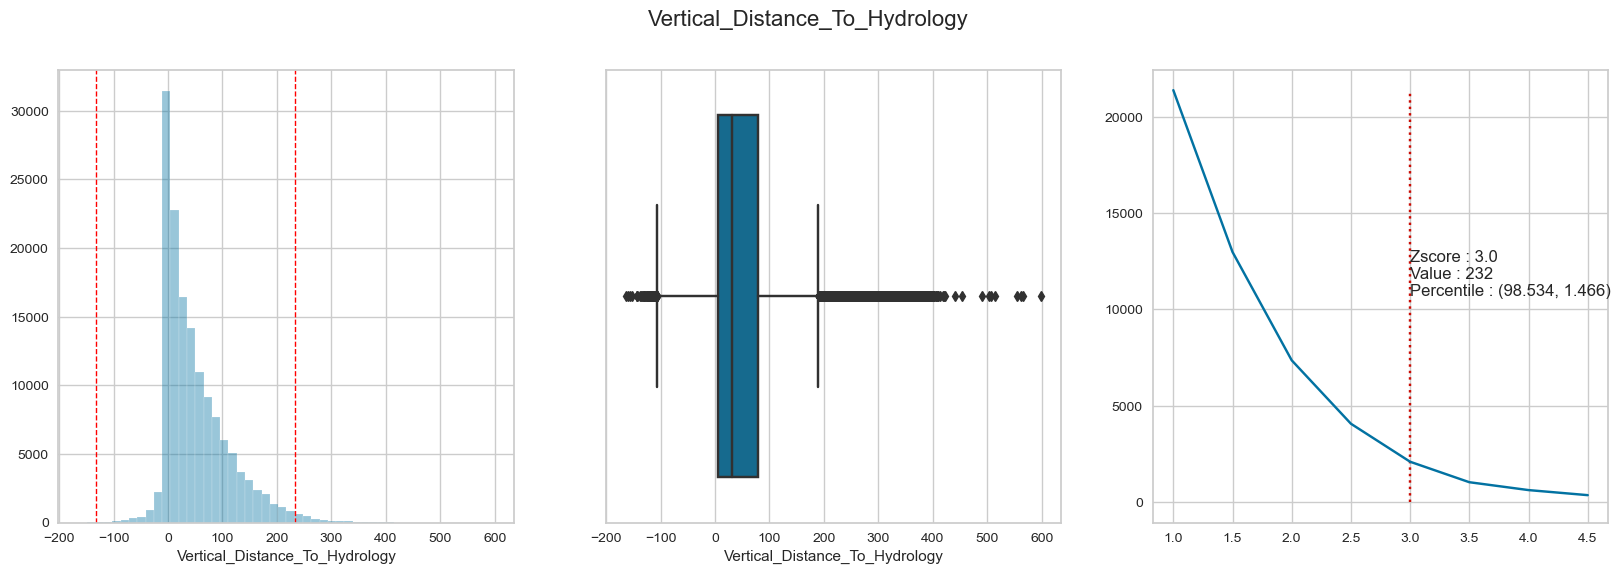

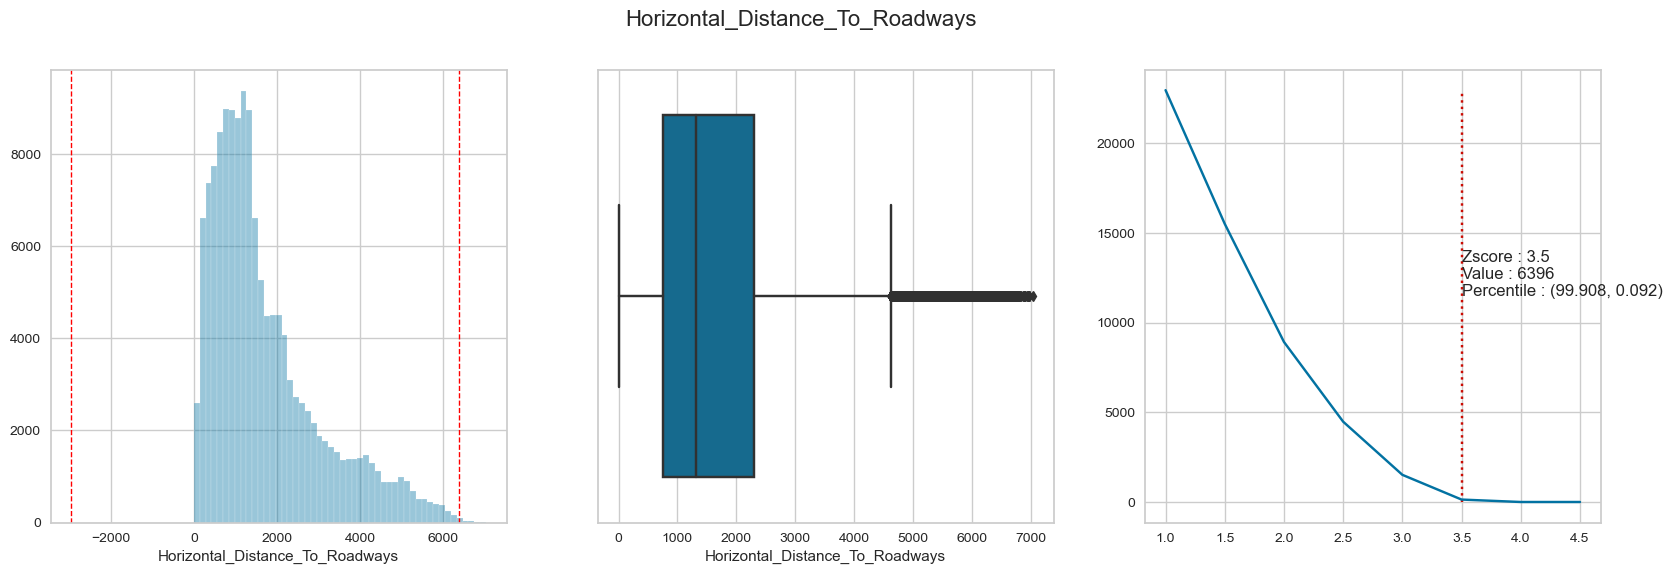

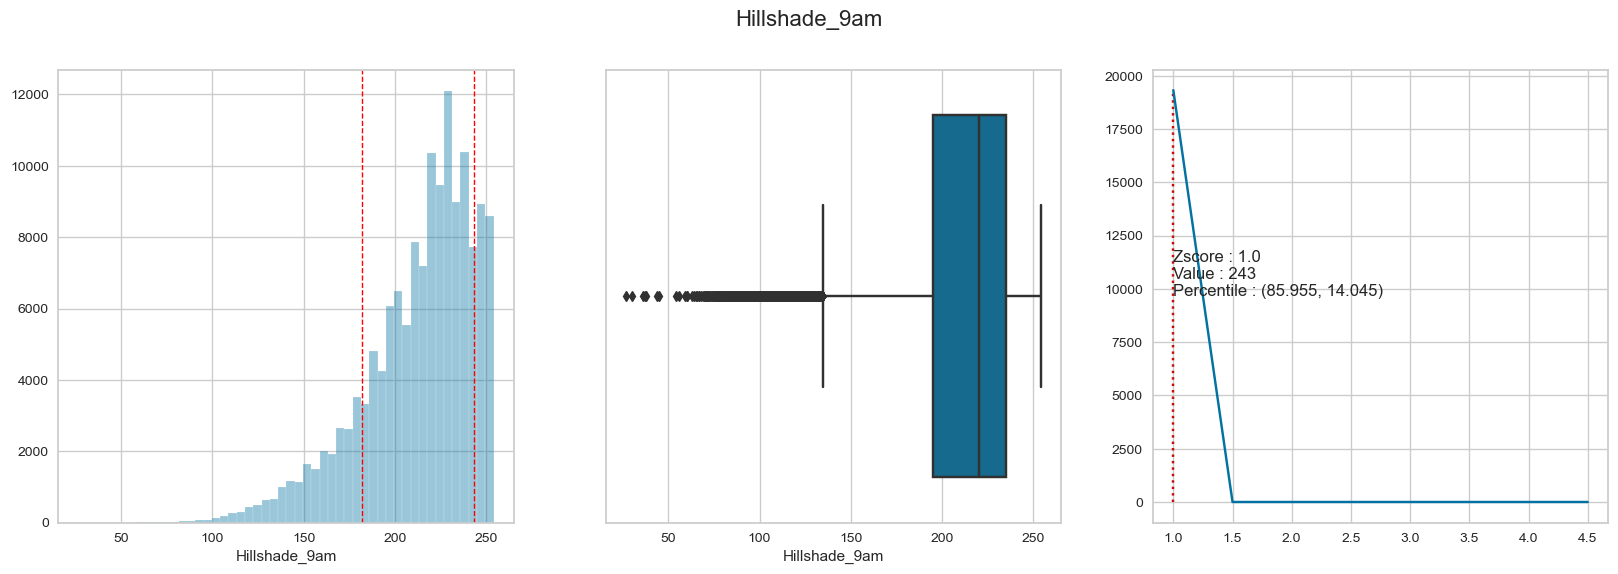

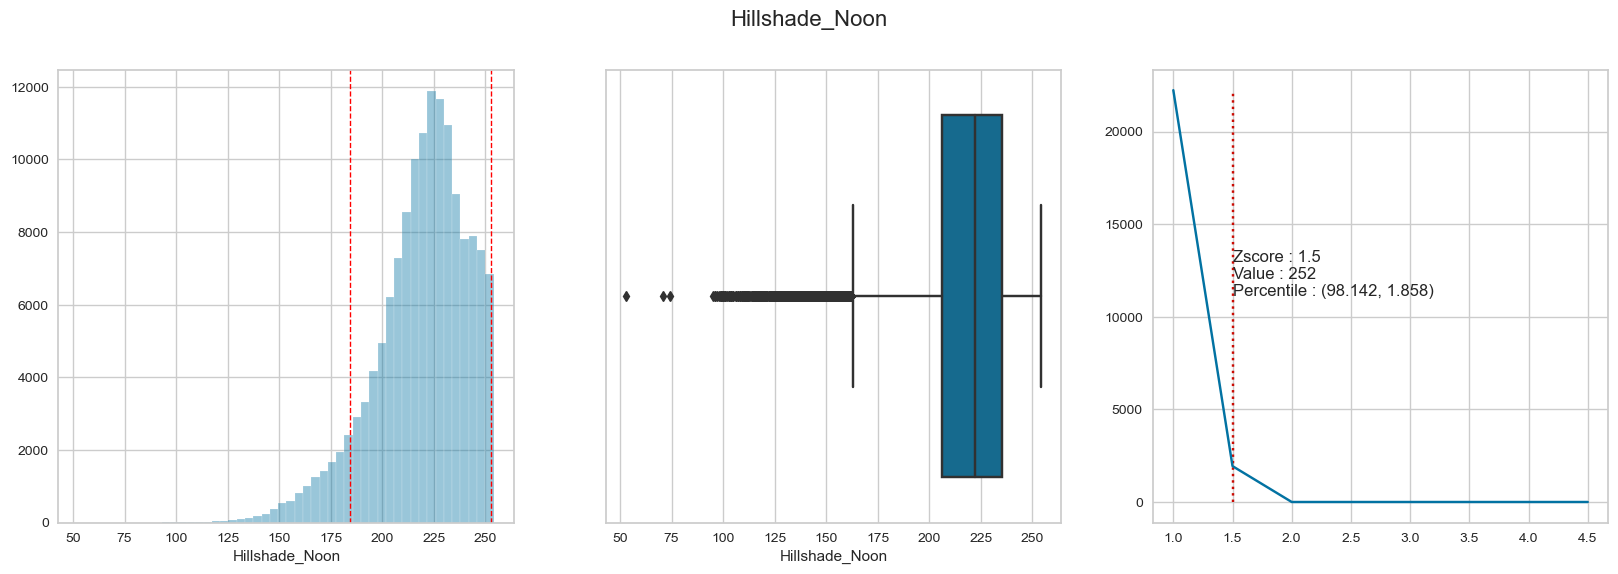

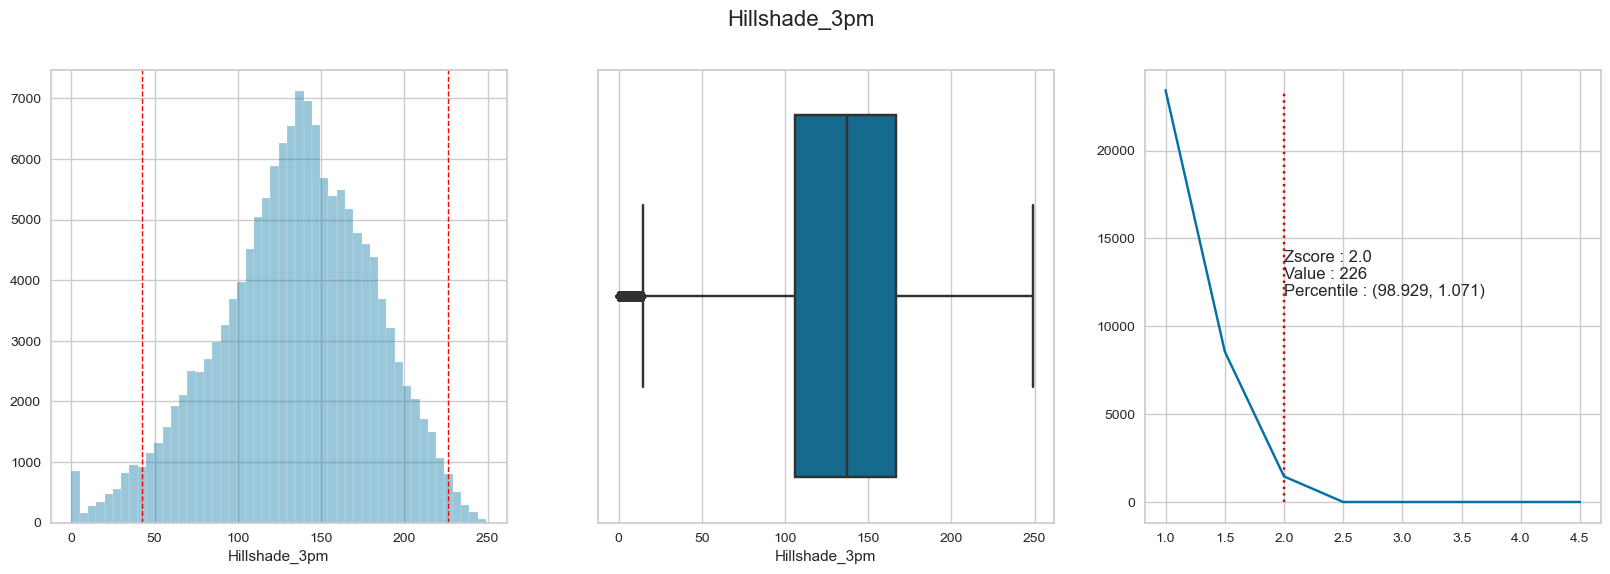

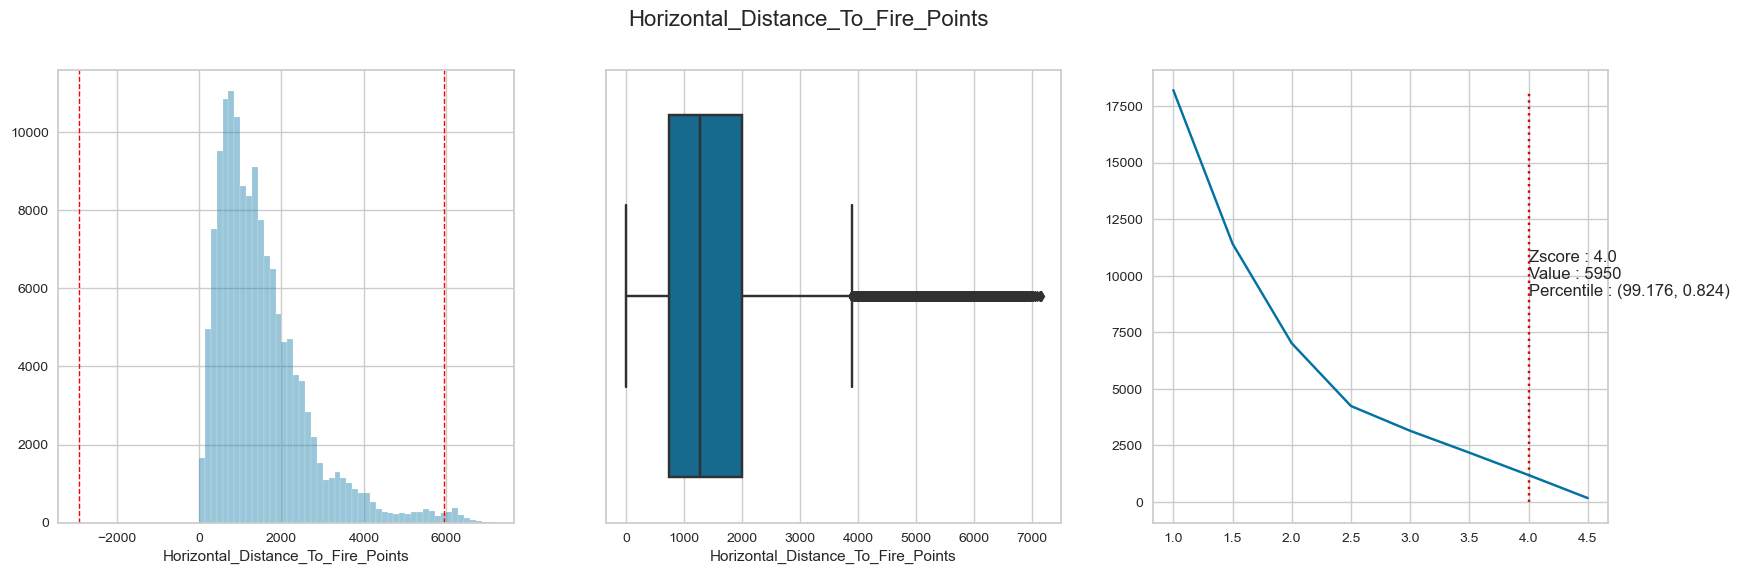

In [276]:
z_scores=[]
for i in df.columns[:-3]:
    z_scores.append(outlier_inspect(df,i)[2])

In [277]:
z_scores

[2.5, 1.5, 3.5, 4.0, 3.0, 3.5, 1.0, 1.5, 2.0, 4.0]

Yukaridaki grefige gore Datanin %99.7 sini kapsayan aralik

In [278]:
df_z=df.copy()
for i in features:
    down_limit= df_z[i].mean() - z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    upper_limit= df_z[i].mean() + z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    condition= (down_limit < df_z[i]) & (df_z[i] < upper_limit)
    df_z=df_z[condition]

In [279]:
print('Number of Outliers:',len(df)-len(df_z))

Number of Outliers: 4372


### Drop Outliers

In [381]:
k=2
for i in features:
    lower,upper,_=detect_outliers(df_winsorised,i,k)
    df_winsorised=df_winsorised[(df_winsorised[i]>lower)&(df_winsorised[i]<upper)]

In [382]:
df=df_winsorised
df.shape

(144614, 13)

In [383]:
# After dropping rows, you can run reset_index()
df = df.reset_index(drop=True)

In [384]:
df.Cover_Type.value_counts(dropna=False).sort_index()

1.0    20674
2.0    20764
3.0    20530
4.0    20601
5.0    20872
6.0    20630
7.0    20543
Name: Cover_Type, dtype: int64

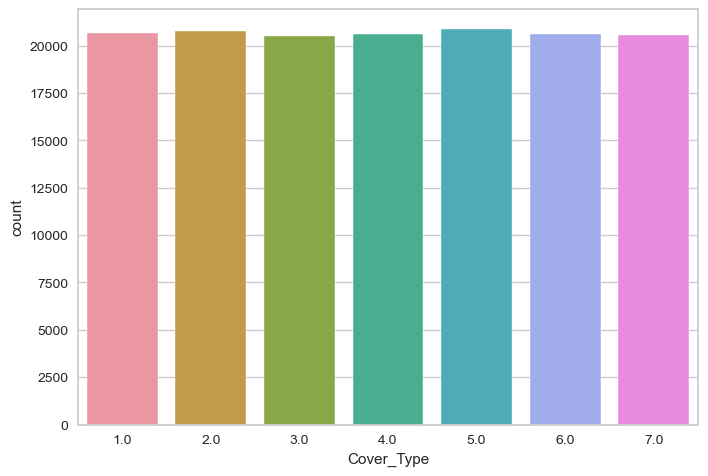

In [385]:
sns.countplot(x='Cover_Type',data=df);

In [386]:
def perc_col(df,col):
    print(f'Percentage of df["{col}"] Unique Values:\n')
    for i in sorted(df[col].unique()):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

In [387]:
perc_col(df,'Cover_Type')

Percentage of df["Cover_Type"] Unique Values:

1.0: %14.30
2.0: %14.36
3.0: %14.20
4.0: %14.25
5.0: %14.43
6.0: %14.27
7.0: %14.21


### Now, let's take a closer look at correlation of continuous columns.

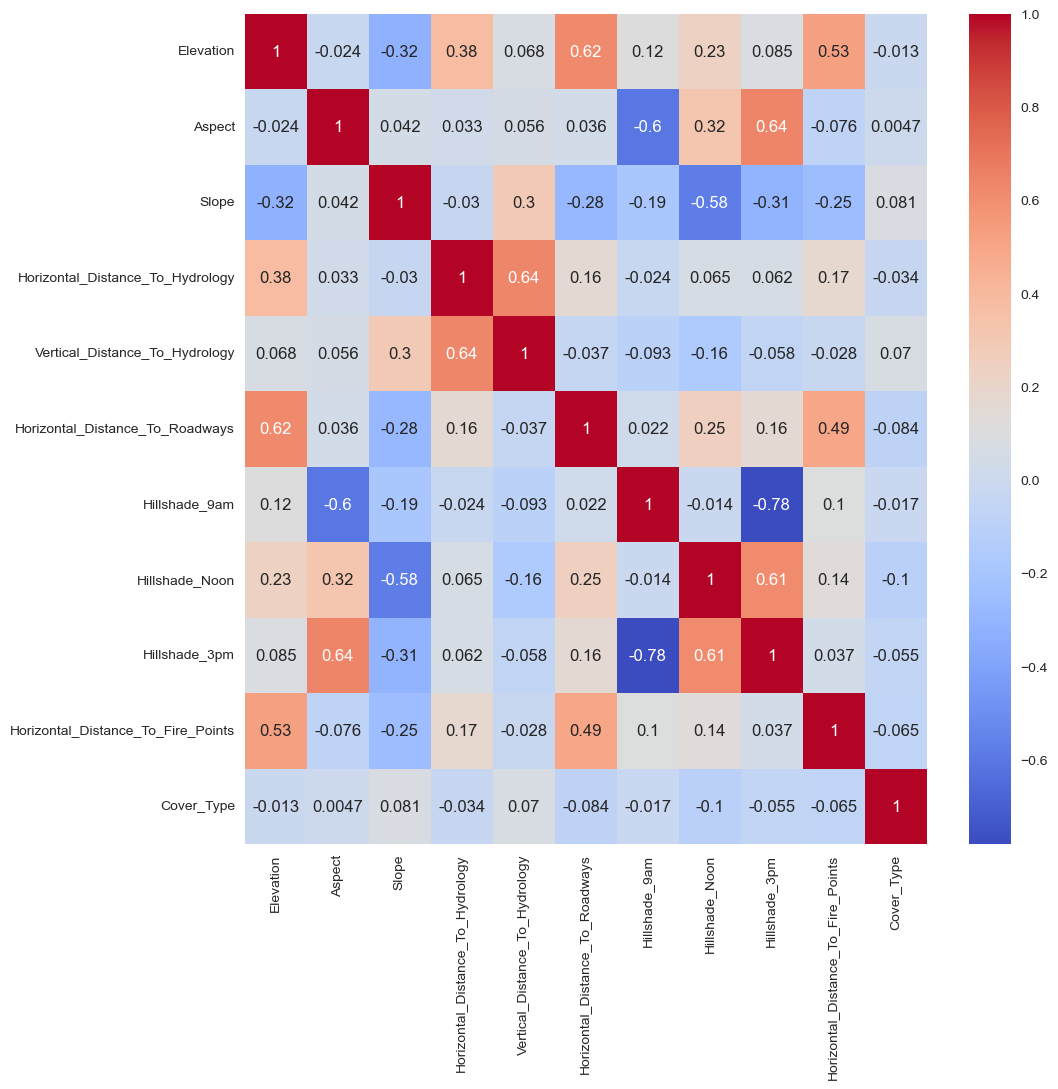

In [388]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

Hillshade_3pm and Hillshade_noon are highly correlated. but I didn't drop it, it can be dropped
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology columns somehow are not correlated enough, so I decided to transform a new column derived from these two columns.
Horizontal_Distance_To_Hydrology and Horizontal_Distance_To_Roadways are not correlated, so I decided to transform a new column derived from these two columns.
Vertical_Distance_To_Hydrology and Elevation are highly correlated, so I decided to transform a new column derived from these two columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [389]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2696     123     10                               212   
1       3269     110     19                               134   
2       3283     322     18                               346   
3       2847      89     28                               270   
4       3248      93     12                               502   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              48                             2245   
1                              40                             3734   
2                             104                             3830   
3                             135                             1320   
4                             118                              570   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            237             231            123   
1            249             216             88   
2            170             217            185   
3            248             173             29   
4            239             221            110   

   Horizontal_Distance_To_Fire_Points  Cover_Type    Wilderness_Area  \
0                                2113         6.0  Wilderness_Area_3   
1                                2850         1.0  Wilderness_Area_1   
2                                1330         7.0  Wilderness_Area_1   
3                                 889         5.0  Wilderness_Area_3   
4                                 945         7.0  Wilderness_Area_3   

      Soil_Type  
0  Soil_Type_10  
1  Soil_Type_38  
2  Soil_Type_38  
3  Soil_Type_13  
4  Soil_Type_31

In [390]:
aa = df['Horizontal_Distance_To_Hydrology']
bb = df['Vertical_Distance_To_Hydrology']
cc = df['Horizontal_Distance_To_Roadways']
dd = df['Elevation']

In [391]:
df['Hypotenuse_Hor_Ver'] = (aa**2 + bb**2)**0.5

In [392]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2696     123     10                               212   
1       3269     110     19                               134   
2       3283     322     18                               346   
3       2847      89     28                               270   
4       3248      93     12                               502   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              48                             2245   
1                              40                             3734   
2                             104                             3830   
3                             135                             1320   
4                             118                              570   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            237             231            123   
1            249             216             88   
2            170             217            185   
3            248             173             29   
4            239             221            110   

   Horizontal_Distance_To_Fire_Points  Cover_Type    Wilderness_Area  \
0                                2113         6.0  Wilderness_Area_3   
1                                2850         1.0  Wilderness_Area_1   
2                                1330         7.0  Wilderness_Area_1   
3                                 889         5.0  Wilderness_Area_3   
4                                 945         7.0  Wilderness_Area_3   

      Soil_Type  Hypotenuse_Hor_Ver  
0  Soil_Type_10          217.366051  
1  Soil_Type_38          139.842769  
2  Soil_Type_38          361.292126  
3  Soil_Type_13          301.869177  
4  Soil_Type_31          515.682073

In [393]:
df['avg_hor_dis_hyd_road'] = (aa + cc)/2

In [394]:
df['avg_elv_ver_hyd'] = (bb + dd)/2

In [395]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2696     123     10                               212   
1       3269     110     19                               134   
2       3283     322     18                               346   
3       2847      89     28                               270   
4       3248      93     12                               502   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              48                             2245   
1                              40                             3734   
2                             104                             3830   
3                             135                             1320   
4                             118                              570   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            237             231            123   
1            249             216             88   
2            170             217            185   
3            248             173             29   
4            239             221            110   

   Horizontal_Distance_To_Fire_Points  Cover_Type    Wilderness_Area  \
0                                2113         6.0  Wilderness_Area_3   
1                                2850         1.0  Wilderness_Area_1   
2                                1330         7.0  Wilderness_Area_1   
3                                 889         5.0  Wilderness_Area_3   
4                                 945         7.0  Wilderness_Area_3   

      Soil_Type  Hypotenuse_Hor_Ver  avg_hor_dis_hyd_road  avg_elv_ver_hyd  
0  Soil_Type_10          217.366051                1228.5           1372.0  
1  Soil_Type_38          139.842769                1934.0           1654.5  
2  Soil_Type_38          361.292126                2088.0           1693.5  
3  Soil_Type_13          301.869177                 795.0           1491.0  
4  Soil_Type_31          515.682073                 536.0           1683.0

In [396]:
df=pd.get_dummies(df)

In [397]:
df.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2696     123     10                               212   
1       3269     110     19                               134   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              48                             2245   
1                              40                             3734   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            237             231            123   
1            249             216             88   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_Soil_Type_37  \
0                                2113  ...                       0   
1                                2850  ...                       0   

   Soil_Type_Soil_Type_38  Soil_Type_Soil_Type_39  Soil_Type_Soil_Type_4  \
0                       0                       0                      0   
1                       1                       0                      0   

   Soil_Type_Soil_Type_40  Soil_Type_Soil_Type_5  Soil_Type_Soil_Type_6  \
0                       0                      0                      0   
1                       0                      0                      0   

   Soil_Type_Soil_Type_7  Soil_Type_Soil_Type_8  Soil_Type_Soil_Type_9  
0                      0                      0                      0  
1                      0                      0                      0  

[2 rows x 58 columns]

In [398]:
df.to_csv("treetypes_for_model.csv", index=False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [399]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from statsmodels.formula.api import ols
from scipy.stats import zscore
from scipy import stats

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
import warnings
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [400]:
conda install -c conda-forge py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [401]:
from xgboost import XGBClassifier

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [402]:
df = pd.read_csv("treetypes_for_model.csv")
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2696     123     10                               212   
1       3269     110     19                               134   
2       3283     322     18                               346   
3       2847      89     28                               270   
4       3248      93     12                               502   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              48                             2245   
1                              40                             3734   
2                             104                             3830   
3                             135                             1320   
4                             118                              570   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            237             231            123   
1            249             216             88   
2            170             217            185   
3            248             173             29   
4            239             221            110   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_Soil_Type_37  \
0                                2113  ...                       0   
1                                2850  ...                       0   
2                                1330  ...                       0   
3                                 889  ...                       0   
4                                 945  ...                       0   

   Soil_Type_Soil_Type_38  Soil_Type_Soil_Type_39  Soil_Type_Soil_Type_4  \
0                       0                       0                      0   
1                       1                       0                      0   
2                       1                       0                      0   
3                       0                       0                      0   
4                       0                       0                      0   

   Soil_Type_Soil_Type_40  Soil_Type_Soil_Type_5  Soil_Type_Soil_Type_6  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   Soil_Type_Soil_Type_7  Soil_Type_Soil_Type_8  Soil_Type_Soil_Type_9  
0                      0                      0                      0  
1                      0                      0                      0  
2                      0                      0                      0  
3                      0                      0                      0  
4                      0                      0                      0  

[5 rows x 58 columns]

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [403]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [405]:
from sklearn.metrics import classification_report,confusion_matrix

In [406]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [407]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [408]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [409]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[3030  687    2    0  139    8  269]
 [ 747 2675  102    0  463  130   36]
 [   0   17 2905  305   72  806    1]
 [   0    0  121 3943    0   56    0]
 [   2  185  115    0 3827   45    0]
 [   0   52  614  167   45 3248    0]
 [ 168    6    0    0    3    0 3932]]
              precision    recall  f1-score   support

         1.0       0.77      0.73      0.75      4135
         2.0       0.74      0.64      0.69      4153
         3.0       0.75      0.71      0.73      4106
         4.0       0.89      0.96      0.92      4120
         5.0       0.84      0.92      0.88      4174
         6.0       0.76      0.79      0.77      4126
         7.0       0.93      0.96      0.94      4109

    accuracy                           0.81     28923
   macro avg       0.81      0.81      0.81     28923
weighted avg       0.81      0.81      0.81     28923


Train_Set
[[12205  2554    13     0   510    24  1233]
 [ 2944 10913   369     9  1842   423   111]
 [    0    61 11724  1195 

In [410]:
from sklearnex import patch_sklearn

In [411]:
from sklearn.svm import SVC

In [412]:
svm = SVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

In [413]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score,
      '\nsvm_recall:',svm_recall)

svm_accuracy: 0.6846108633267641 
svm_f1_score: 0.6754428977100989 
svm_recall: 0.6846108633267641


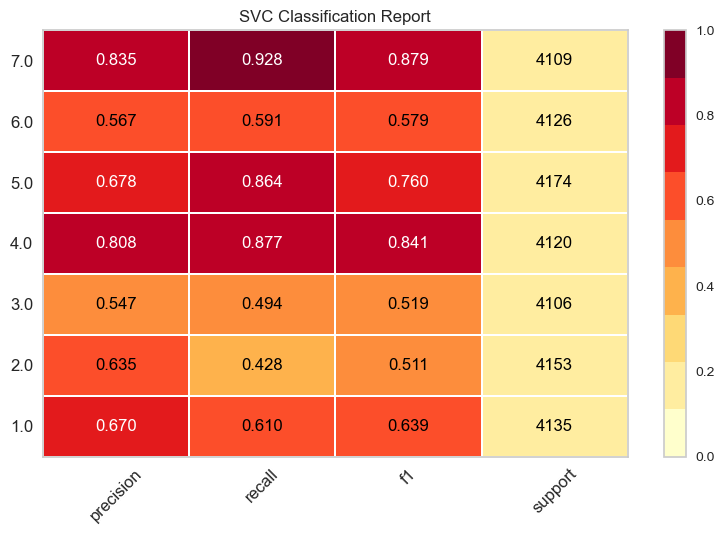

In [415]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [416]:
param_grid = {'C': [5 ,7, 9]}
               
               

In [417]:
from sklearn.model_selection import GridSearchCV

In [418]:
grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_svc.fit(X_train,y_train)
 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................C=5;, score=0.707 total time= 1.8min
[CV 2/5] END ...............................C=5;, score=0.711 total time= 1.6min
[CV 3/5] END ...............................C=5;, score=0.709 total time= 1.5min
[CV 4/5] END ...............................C=5;, score=0.708 total time= 1.4min
[CV 5/5] END ...............................C=5;, score=0.712 total time= 1.5min
[CV 1/5] END ...............................C=7;, score=0.712 total time= 1.4min
[CV 2/5] END ...............................C=7;, score=0.716 total time= 1.5min
[CV 3/5] END ...............................C=7;, score=0.716 total time= 2.0min
[CV 4/5] END ...............................C=7;, score=0.713 total time= 1.4min
[CV 5/5] END ...............................C=7;, score=0.719 total time= 1.4min
[CV 1/5] END ...............................C=9;, score=0.718 total time= 2.0min
[CV 2/5] END ...............................C=9;,

GridSearchCV(estimator=SVC(), param_grid={'C': [5, 7, 9]}, verbose=3)

In [419]:
grid_svc.best_params_

{'C': 9}

In [420]:
y_pred = grid_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.68      0.63      0.66      4135
         2.0       0.67      0.45      0.54      4153
         3.0       0.62      0.59      0.61      4106
         4.0       0.85      0.92      0.89      4120
         5.0       0.71      0.88      0.79      4174
         6.0       0.64      0.67      0.65      4126
         7.0       0.85      0.93      0.89      4109

    accuracy                           0.72     28923
   macro avg       0.72      0.72      0.72     28923
weighted avg       0.72      0.72      0.72     28923



### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [111]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [421]:
from sklearn.tree import DecisionTreeClassifier

In [422]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

In [423]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3369  636    4    0   34    4   88]
[ 660 3215   67    0  129   65   17]
[   1   47 3768   51   23  216    0]
[   0    0   42 4055    0   23    0]
[  19   73   17    0 4059    6    0]
[   6   39  173   27   13 3868    0]
[ 104   10    0    0    1    0 3994]
              precision    recall  f1-score   support

         1.0       0.81      0.81      0.81      4135
         2.0       0.80      0.77      0.79      4153
         3.0       0.93      0.92      0.92      4106
         4.0       0.98      0.98      0.98      4120
         5.0       0.95      0.97      0.96      4174
         6.0       0.92      0.94      0.93      4126
         7.0       0.97      0.97      0.97      4109

    accuracy                           0.91     28923
   macro avg       0.91      0.91      0.91     28923
weighted avg       0.91      0.91      0.91     28923



In [424]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
print('dt_accuracy:',dt_accuracy,
      '\ndt_f1_score:',dt_f1_score,
      '\ndt_recall:',dt_recall)

dt_accuracy: 0.9102790166995125 
dt_f1_score: 0.9099398863373872 
dt_recall: 0.9102790166995125


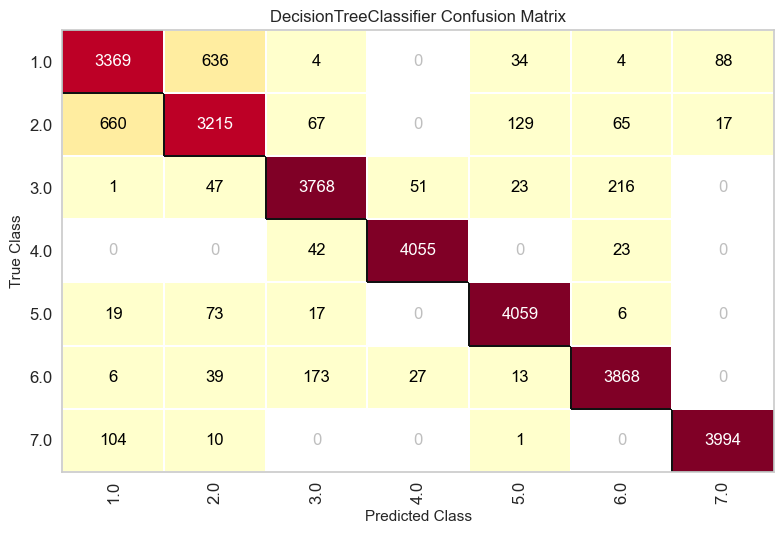

In [425]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dt)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [426]:
from sklearn.ensemble import RandomForestClassifier

In [427]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [428]:
y_pred = rfc.predict(X_test)

In [331]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[3448  505    3    0   47    8  124]
[ 488 3339   82    0  135   93   16]
[   0    5 3724  115   18  244    0]
[   0    0   14 4095    0   11    0]
[   1   28   12    0 4120   13    0]
[   0    7  127   50   13 3929    0]
[  31    2    0    0    2    0 4074]
              precision    recall  f1-score   support

         1.0       0.87      0.83      0.85      4135
         2.0       0.86      0.80      0.83      4153
         3.0       0.94      0.91      0.92      4106
         4.0       0.96      0.99      0.98      4120
         5.0       0.95      0.99      0.97      4174
         6.0       0.91      0.95      0.93      4126
         7.0       0.97      0.99      0.98      4109

    accuracy                           0.92     28923
   macro avg       0.92      0.92      0.92     28923
weighted avg       0.92      0.92      0.92     28923



In [429]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.9242471389551568 
rfc_f1_score: 0.9231812401284095 
rfc_recall: 0.9242471389551568


In [430]:
rfc_accuracy = cross_val_score(rfc, X_test, y_test,cv = 10).mean()
rfc_f1_score = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
rfc_recall = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
print('rfc_accuracy:',rfc_accuracy,
       '\nrfc_f1_score:',rfc_f1_score,
       '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.8818239548029082 
rfc_f1_score: 0.8798755420532688 
rfc_recall: 0.879853119969555


### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [431]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

[16:31:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [432]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[3339  609    4    0   50    2  131]
 [ 611 3186   77    0  186   77   16]
 [   0   10 3681   55   24  336    0]
 [   0    0    5 4106    0    9    0]
 [   1   30   16    0 4120    7    0]
 [   1    8  155   20   18 3924    0]
 [  46    2    0    0    2    0 4059]]
              precision    recall  f1-score   support

         1.0       0.84      0.81      0.82      4135
         2.0       0.83      0.77      0.80      4153
         3.0       0.93      0.90      0.92      4106
         4.0       0.98      1.00      0.99      4120
         5.0       0.94      0.99      0.96      4174
         6.0       0.90      0.95      0.93      4126
         7.0       0.97      0.99      0.98      4109

    accuracy                           0.91     28923
   macro avg       0.91      0.91      0.91     28923
weighted avg       0.91      0.91      0.91     28923


Train_Set
[[14367  1683     4     0   146     3   336]
 [ 1794 13906   190     0   527   174    20]
 [    0    11 15335    77 

In [433]:
y_pred = xgb.predict(X_test)

In [434]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.81      0.82      4135
         2.0       0.83      0.77      0.80      4153
         3.0       0.93      0.90      0.92      4106
         4.0       0.98      1.00      0.99      4120
         5.0       0.94      0.99      0.96      4174
         6.0       0.90      0.95      0.93      4126
         7.0       0.97      0.99      0.98      4109

    accuracy                           0.91     28923
   macro avg       0.91      0.91      0.91     28923
weighted avg       0.91      0.91      0.91     28923



In [435]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.9132870034228815 
xgb_f1_score: 0.9120332992624435 
xgb_recall: 0.9132870034228815


In [436]:
xgb_accuracy = cross_val_score(xgb, X_test, y_test,cv = 10).mean()
xgb_f1_score = cross_val_score(xgb, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
rfc_recall = cross_val_score(xgb, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
print('xgb_accuracy:',xgb_accuracy,
       '\nxgbc_f1_score:',xgb_f1_score,
       '\nxgb_recall:',xgb_recall)

[16:37:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:36] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[16:52:41] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb_accuracy: 0.8877363158747757 
xgbc_f1_score: 0.8858423434420489 
xgb_recall: 0.9132870034228815


### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

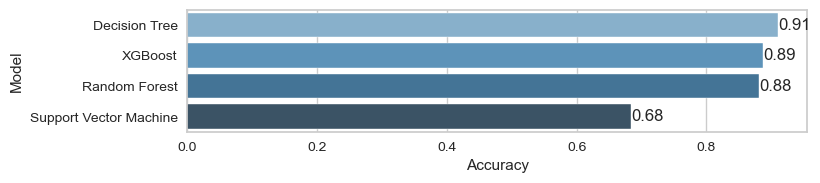

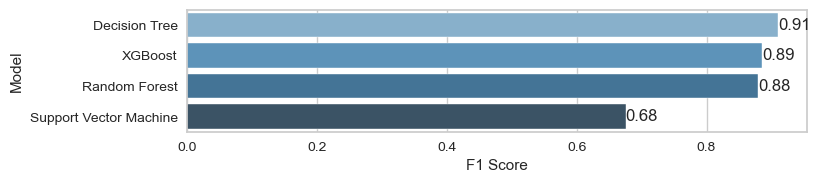

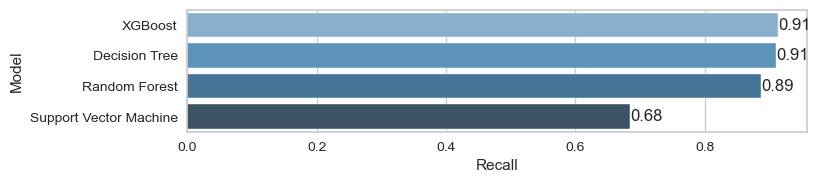

In [442]:
compare = pd.DataFrame({"Model": ["Random Forest", 
                                  "XGBoost",
#                                   "Logistic Regression",
#                                   'Naive Bayes',
#                                   'Ada Boosting',
                                  'Support Vector Machine', 
                                  "Decision Tree",
#                                  "K-Nearest Neighbor",
                                 ],
                        "Accuracy": [rfc_accuracy, 
                                     xgb_accuracy, 
#                                      log_accuracy, 
#                                      nb_accuracy,
#                                      ada_accuracy, 
                                     svm_accuracy,
                                     dt_accuracy,
#                                     knn_accuracy,
                                     ],
                        "F1 Score": [rfc_f1_score, 
                                     xgb_f1_score, 
#                                      log_f1_score, 
#                                      nb_f1_score, 
#                                      ada_f1_score, 
                                     svm_f1_score, 
                                     dt_f1_score,
#                                     knn_f1_score,
                                    ],
                        "Recall": [rfc_recall, 
                                   xgb_recall, 
#                                    log_recall, 
#                                    nb_recall,
#                                    ada_recall, 
                                   svm_recall,
                                   dt_recall,
#                                   knn_recall,
                                  ]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(312)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(313)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___